## Evaluating scGWAS results when using Pathway Commons v12 vs Pathway Commons v14

In [2]:
library(data.table)
#library(tidyverse)
#library("EnsDb.Hsapiens.v86")
#library(reshape2)
library(R.utils)
library(UpSetR)
library(grid)
library(cowplot)
library(ggnewscale)
library(GGally)

In [59]:
meta_colors_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="#d0b4dc",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="#FCCDE5", 
                 "M-2: MERTK+ S100A8+"="#945cb4", 
                 "M-3: MERTK+ HBEGF+"="#842bd7", 
                 "M-4: SPP1+"="yellow4", 
                 "M-5: C1QA+"="#B38072",
                 "M-6: STAT1+ CXCL10+"="#d11141", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="#FDB462", 
                 "M-8: PLCG2+"="grey", 
                 "M-9: DC3"="#1F78B4", 
                 "M-10: DC2"="#A6CEE3", 
                 "M-11: CD16+/DC4"="#66C2A4", 
                 "M-12: DC1"="#CCECE6",
                 "M-13: pDC"="#238B45", 
                 "M-14: LAMP3+"="#A1D99B")
meta_colors_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="#d0b4dc",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="#FCCDE5", 
                 "M-2: MERTK+ S100A8+"="#945cb4", 
                 "M-3: MERTK+ HBEGF+"="#842bd7", 
                 "M-4: SPP1+"="yellow4", 
                 "M-5: C1QA+"="#B38072",
                 "M-6: STAT1+ CXCL10+"="#d11141", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="#FDB462", 
                 "M-8: PLCG2+"="grey", 
                 "M-9: DC3"="#1F78B4", 
                 "M-10: DC2"="#A6CEE3", 
                 "M-11: CD16+/DC4"="#66C2A4", 
                 "M-12: DC1"="#CCECE6",
                 "M-13: pDC"="#238B45", 
                 "M-14: LAMP3+"="#A1D99B")
meta_colors_fib <- c('F-0: PRG4+ CLIC5+ lining'='#A6CEE3',
                   'F-1: PRG4+ lining'='#1F78B4', 
                   'F-2: CD34+ sublining'='#B2DF8A', 
                   'F-3: POSTN+ sublining'='#33A02C', 
                   'F-4: DKK3+ sublining'='#E31A1C', 
                   'F-5: CD74-hi sublining'='#FB9A99', 
                   'F-6: CXCL12+ SFRP1+ sublining'='#FDBF6F', 
                   'F-7: NOTCH3+ sublining'='#FF7F00', 
                   'F-8: RSPO3+ intermediate'='#6495ED', 
                   'Mu-0: Mural'='#9932CC')
meta_colors_fib_clean <- c(
                   'F-2: CD34+ sublining'='#B2DF8A',
                   'F-7: NOTCH3+ sublining'='#FF7F00')

meta_colors_b <- c("B-0: CD24+CD27+CD11b+\n switched memory" = "#A6CEE3", 
                   "B-1: CD24++CD27+IgM+\n unswitched memory" = "#B2DF8A", 
                   "B-2: IgM+IgD+TCL1A+ naive" = "#FF7F00", 
                   "B-3: IgM+IgD+CD1c+ MZ-like" = "#1F78B4",
                   "B-4: AICDA+BCL6+ GC-like" = "#33A02C",
                   "B-5: CD11c+LAMP1+ ABC" = "#CAB2D6",
                   "B-6: IgM+ plasma" = "#FDBF6F", 
                   "B-7: HLA-DR+IgG+ plasmablast" = "brown",
                   "B-8: IgG1+IgG3+ plasma" = "#6A3D9A"
                   )

meta_colors_t <- c("T-0: CD4+ IL7R+ memory" = "#A6CEE3", "T-1: CD4+ CD161+ memory" = "#1F78B4", 
                 "T-2: CD4+ IL7R+CCR5+ memory" = "#B2DF8A", "T-3: CD4+ Tfh/Tph" = "#33A02C", 
                 "T-4: CD4+ naive" = "#FB9A99", "T-5: CD4+ GZMK+ memory" = "#E31A1C", 
                 "T-6: CD4+ memory" = "#FDBF6F", "T-7: CD4+ Tph" = "#FF7F00", 
                 "T-8: CD4+ CD25-high Treg" = "#CAB2D6", "T-9: CD4+ CD25-low Treg" = "#6A3D9A", 
                 "T-10: CD4+ OX40+NR3C1+" = "#FFFF99", "T-11: CD4+ CD146+ memory" = "#B15928", 
                 "T-12: CD4+ GNLY+" = "#B3E2CD", "T-13: CD8+ GZMK/B+ memory" = "#FDCDAC", 
                 "T-14: CD8+ GZMK+ memory" = "#CBD5E8", "T-15: CD8+ GZMB+/TEMRA" = "#F4CAE4",
                 "T-16: CD8+ CD45ROlow/naive" = "#1B9E77", "T-17: CD8+ activated/NK-like" = "#D95F02",
                 "T-18: Proliferating" = "#7570B3", "T-19: MT-high (low quality)" = "#E7298A", 
                 "T-20: CD38+" = "#66A61E", "T-21: Innate-like" = "#E6AB02", 
                 "T-22: Vdelta1" = "#A6761D", "T-23: Vdelta2" = "#666666")

meta_colors_nk <- c("NK-0: CD56dim CD16+ IFNG-" = "#9E0142", 
                    "NK-1: CD56dim CD16+ IFNG+CD160+" = "#D53E4F", 
                    "NK-2: CD56dim CD16+ IFNG+CD160-" = "#F46D43",
                    "NK-3: CD56dim CD16+ GZMB-" = "#FDAE61", 
                    "NK-4: CD56bright CD16- GZMA+CD160+" = "#FEE08B", 
                    "NK-5: CD56bright CD16- GZMA+CD69+" = "#FFFFBF", 
                    "NK-6: CD56bright CD16- GNLY+" = "#E6F598", 
                    "NK-7: CD56bright CD16- GNLY+CD69+" = "#ABDDA4", 
                    "NK-8: CD56bright CD16- IFN response" = "#66C2A5",
                    "NK-9: MT-high" = "#3288BD", 
                    "NK-10: PCNA+ Proliferating" = "grey",
                    "NK-11: MKI67+ Proliferating" = "dimgrey", 
                    "NK-12: IL7R+ ILC" = "#BEAED4", 
                    "NK-13: IL7R+CD161+ ILC" = "#5E4FA2")

meta_colors_end <- c("E-0: SPARC+ capillary" = "#8DD3C7", 
                     "E-1: LIFR+ venular" = "#BEBADA",
                     "E-2: ICAM1+ venular" = "#FB8072", 
                     "E-3: NOTCH4+ arteriolar" = "#80B1D3", 
                     "E-4: Lymphatic" = "#FDB462")

meta_colors <- c(meta_colors_t, meta_colors_nk, 
                 meta_colors_mac, meta_colors_b,
                meta_colors_fib, meta_colors_end)
meta_colors_clean <- c(meta_colors_t, meta_colors_nk, 
                 meta_colors_mac, meta_colors_b,
                meta_colors_fib_clean)

In [29]:
meta_colors1 <- list(meta_colors_end, meta_colors_fib, 
                     meta_colors_b, meta_colors_mac,
                     meta_colors_nk, meta_colors_t)
meta_colors1_clean <- list(meta_colors_fib_clean, 
                     meta_colors_b, meta_colors_mac,
                     meta_colors_nk, meta_colors_t)

In [86]:
exp_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="#756bb1",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="#756bb1", 
                 "M-2: MERTK+ S100A8+"="#756bb1", 
                 "M-3: MERTK+ HBEGF+"="#756bb1", 
                 "M-4: SPP1+"="#bcbddc", 
                 "M-5: C1QA+"="white",
                 "M-6: STAT1+ CXCL10+"="#756bb1", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="#756bb1", 
                 "M-8: PLCG2+"="white", 
                 "M-9: DC3"="white", 
                 "M-10: DC2"="white", 
                 "M-11: CD16+/DC4"="white", 
                 "M-12: DC1"="white",
                 "M-13: pDC"="white", 
                 "M-14: LAMP3+"="white")
exp_fib <- c('F-0: PRG4+ CLIC5+ lining'='white',
                   'F-1: PRG4+ lining'='white', 
                   'F-2: CD34+ sublining'='#756bb1', 
                   'F-3: POSTN+ sublining'='white', 
                   'F-4: DKK3+ sublining'='white', 
                   'F-5: CD74-hi sublining'='white', 
                   'F-6: CXCL12+ SFRP1+ sublining'='white', 
                   'F-7: NOTCH3+ sublining'='#756bb1', 
                   'F-8: RSPO3+ intermediate'='white', 
                   'Mu-0: Mural'='white')
exp_fib_clean <- c(
                   'F-2: CD34+ sublining'='#756bb1', 
                   'F-7: NOTCH3+ sublining'='#756bb1')

exp_b <- c("B-0: CD24+CD27+CD11b+\n switched memory" = "#756bb1", 
                   "B-1: CD24++CD27+IgM+\n unswitched memory" = "white", 
                   "B-2: IgM+IgD+TCL1A+ naive" = "white", 
                   "B-3: IgM+IgD+CD1c+ MZ-like" = "white",
                   "B-4: AICDA+BCL6+ GC-like" = "white",
                   "B-5: CD11c+LAMP1+ ABC" = "#756bb1",
                   "B-6: IgM+ plasma" = "white", 
                   "B-7: HLA-DR+IgG+ plasmablast" = "white",
                   "B-8: IgG1+IgG3+ plasma" = "white"
                   )

exp_t <- c("T-0: CD4+ IL7R+ memory" = "#bcbddc", "T-1: CD4+ CD161+ memory" = "#bcbddc", 
                 "T-2: CD4+ IL7R+CCR5+ memory" = "#bcbddc", "T-3: CD4+ Tfh/Tph" = "#756bb1", 
                 "T-4: CD4+ naive" = "white", "T-5: CD4+ GZMK+ memory" = "#bcbddc", 
                 "T-6: CD4+ memory" = "#bcbddc", "T-7: CD4+ Tph" = "#756bb1", 
                 "T-8: CD4+ CD25-high Treg" = "#756bb1", "T-9: CD4+ CD25-low Treg" = "#756bb1", 
                 "T-10: CD4+ OX40+NR3C1+" = "white", "T-11: CD4+ CD146+ memory" = "#bcbddc", 
                 "T-12: CD4+ GNLY+" = "white", "T-13: CD8+ GZMK/B+ memory" = "#756bb1", 
                 "T-14: CD8+ GZMK+ memory" = "#756bb1", "T-15: CD8+ GZMB+/TEMRA" = "white",
                 "T-16: CD8+ CD45ROlow/naive" = "white", "T-17: CD8+ activated/NK-like" = "white",
                 "T-18: Proliferating" = "white", "T-19: MT-high (low quality)" = "white", 
                 "T-20: CD38+" = "white", "T-21: Innate-like" = "white", 
                 "T-22: Vdelta1" = "white", "T-23: Vdelta2" = "white")

exp_nk <- c("NK-0: CD56dim CD16+ IFNG-" = "#bcbddc", 
                    "NK-1: CD56dim CD16+ IFNG+CD160+" = "#bcbddc", 
                    "NK-2: CD56dim CD16+ IFNG+CD160-" = "#bcbddc",
                    "NK-3: CD56dim CD16+ GZMB-" = "#bcbddc", 
                    "NK-4: CD56bright CD16- GZMA+CD160+" = "#bcbddc", 
                    "NK-5: CD56bright CD16- GZMA+CD69+" = "#bcbddc", 
                    "NK-6: CD56bright CD16- GNLY+" = "#bcbddc", 
                    "NK-7: CD56bright CD16- GNLY+CD69+" = "#bcbddc", 
                    "NK-8: CD56bright CD16- IFN response" = "#bcbddc",
                    "NK-9: MT-high" = "white", 
                    "NK-10: PCNA+ Proliferating" = "white",
                    "NK-11: MKI67+ Proliferating" = "white", 
                    "NK-12: IL7R+ ILC" = "white", 
                    "NK-13: IL7R+CD161+ ILC" = "white")

exp_end <- c("E-0: SPARC+ capillary" = "white", 
                     "E-1: LIFR+ venular" = "white",
                     "E-2: ICAM1+ venular" = "white", 
                     "E-3: NOTCH4+ arteriolar" = "white", 
                     "E-4: Lymphatic" = "white")

exp_colors <- c(exp_t, exp_nk, 
                 exp_mac, exp_b,
                exp_fib, exp_end)
exp_colors_clean <- c(exp_t, exp_nk, 
                 exp_mac, exp_b,
                exp_fib_clean)

## Large scale cell types

In [8]:
scgwas_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/scGWAS/RA/50_35/"
scgwas_old <- fread(paste0(scgwas_dir, "RA_signif_celltypes_2023.sig_module.txt"))
scgwas_old[1:2,]

scgwas_new <- fread("/Users/hopekirby/Desktop/SCRNA-GWAS-Benchmarking/output/scGWAS_Path/scGWAS_cell_new_pathway.sig_module.txt", )
scgwas_new[1:2,]
dim(scgwas_new)

scgwas_old_macro_count <- data.frame(table(scgwas_old$cell_type))
scgwas_new_macro_count <- data.frame(table(scgwas_new$cell_type))
scgwas_old_macro_count
scgwas_new_macro_count

module_genes                      seed   edges                           
1 DDX6:JUN:REL                      ITGAX  117581:117630                   
2 CD2:CORO1A:ETS1:MBNL1:PTPRC:STAT4 RBFOX2 98257:281108:146614:226251:74584
  module_score m_gwas   m_scrnaseq module_score_z z_gwas   z_scrnaseq cell_type
1  8.634028    6.157311 4.001269   3.144241       1.911092 2.033238   B cell   
2 11.296277    7.958499 5.251743   2.819319       2.121926 1.782231   NK       
  trait panel   p           p_gwas     p_scrn    
1 RA    amp2_RA 0.003532945 0.04698816 0.02826356
2 RA    amp2_RA 0.005003451 0.03830228 0.04451346

module_genes   seed  edges        module_score m_gwas  m_scrnaseq
1 CD2:DDX6:PTPRC ASCC2 56477:271626 9.402915     6.58566 4.37818   
2 NA             NA    NA                 NA          NA      NA   
  module_score_z z_gwas   z_scrnaseq cell_type trait panel p          
1 2.623283       1.906947 1.789086   T cell    RA    RA    0.004927674
2       NA             NA       NA   NA        NA    NA             NA
  p_gwas     p_scrn    
1 0.04037514 0.03687808
2         NA         NA

[1]  1 15

Var1   Freq
1 B cell 1   
2 NK     2   
3 T cell 3

Var1   Freq
1 T cell 1

In [13]:
# 10kb

#scgwas_micro <- fread(paste0(scgwas_dir, "RA_clusters.sig_module.txt"))
scgwas_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/scGWAS/RA/10kb/"
scgwas_old_10 <- fread(paste0(scgwas_dir, "RA_celltypes.sig_module.txt"))
scgwas_old_10[1:2,]

#scgwas_new_10 <- fread(paste0(scgwas_dir, "RA_celltypes_newpath.sig_module.txt"))
#scgwas_new_10[1:2,]
dim(scgwas_new)

scgwas_old_macro_count_10 <- data.frame(table(scgwas_old_10$cell_type))
scgwas_old_macro_count_10

module_genes                   seed     edges                               
1 DDX6:JUN:REL                   SLC25A51 104437:104390                       
2 CD2:CD247:DDX6:KLRD1:PTPRC:REL ZBTB38   65089:65778:104437:65253:65768:65183
  module_score m_gwas   m_scrnaseq module_score_z z_gwas   z_scrnaseq cell_type
1  8.752553    6.358486 4.036183   2.936995       1.976839 1.952324   B cell   
2 12.589705    7.804537 6.035832   3.799265       2.379780 2.449401   NK       
  trait panel p           p_gwas     p_scrn    
1 RA    RA    0.001882353 0.04235294 0.02211765
2 RA    RA    0.000000000 0.02133642 0.01157790

[1]  1 15

Var1   Freq
1 B cell 1   
2 NK     2

In [14]:
# add cell type to Macro
data_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/data/SC_data/amp2/"
meta_data <- readRDS(paste0(data_dir, "meta_qc_amp2RA_exp_norm_2023_06_13.rds"))
unique(meta_data$cell_type)


[1] "B cell"      "Endothelial" "Myeloid"     "Fibroblast"  "NK"         
[6] "T cell"

In [15]:
scgwas_macro_old_graph <- scgwas_old[,c("cell_type", "module_score_z")]
scgwas_macro_old_graph

scgwas_macro_old_graph_10 <- scgwas_old[,c("cell_type", "module_score_z")]
scgwas_macro_old_graph_10

scgwas_macro_new_graph <- scgwas_new[,c("cell_type", "module_score_z")]
scgwas_macro_new_graph
# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(unique(meta_data$cell_type), scgwas_old$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(unique(meta_data$cell_type), scgwas_old$cell_type)))))

scgwas_macro_old_graph <- rbind(scgwas_macro_old_graph, add_df)    

# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(unique(meta_data$cell_type), scgwas_old_10$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(unique(meta_data$cell_type), scgwas_old_10$cell_type)))))

scgwas_macro_old_graph_10 <- rbind(scgwas_macro_old_graph_10, add_df)  

# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(unique(meta_data$cell_type), scgwas_new$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(unique(meta_data$cell_type), scgwas_new$cell_type)))))

scgwas_macro_new_graph <- rbind(scgwas_macro_new_graph, add_df) 




cell_type module_score_z
1 B cell    3.144241      
2 NK        2.819319      
3 NK        2.802139      
4 T cell    2.940912      
5 T cell    2.914679      
6 T cell    3.102704

cell_type module_score_z
1 B cell    3.144241      
2 NK        2.819319      
3 NK        2.802139      
4 T cell    2.940912      
5 T cell    2.914679      
6 T cell    3.102704

cell_type module_score_z
1 T cell    2.623283

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


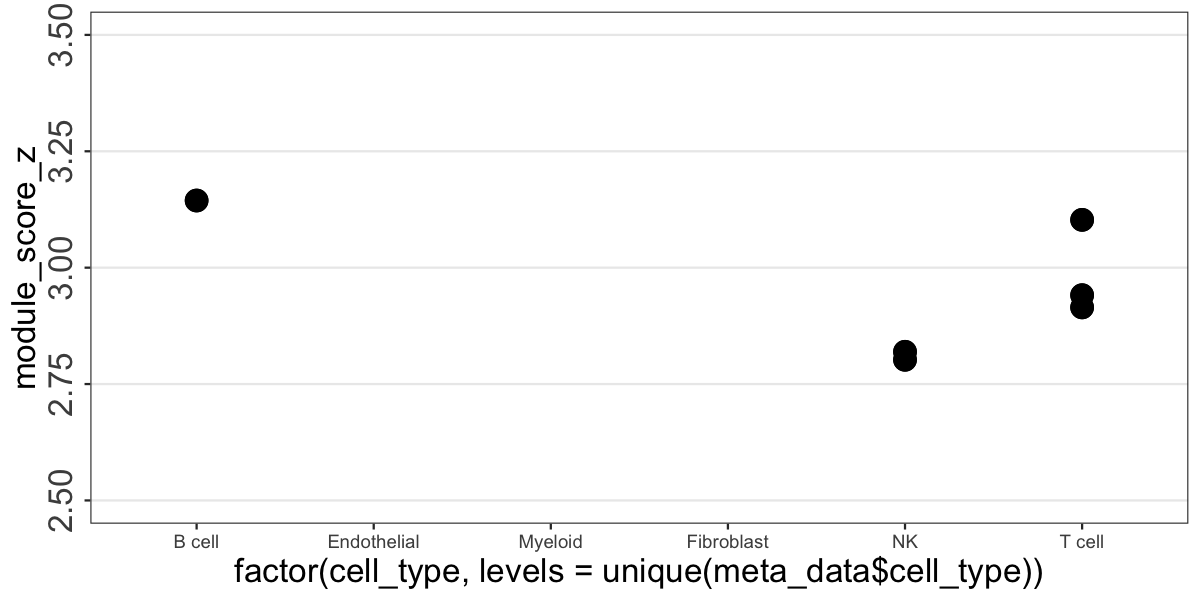

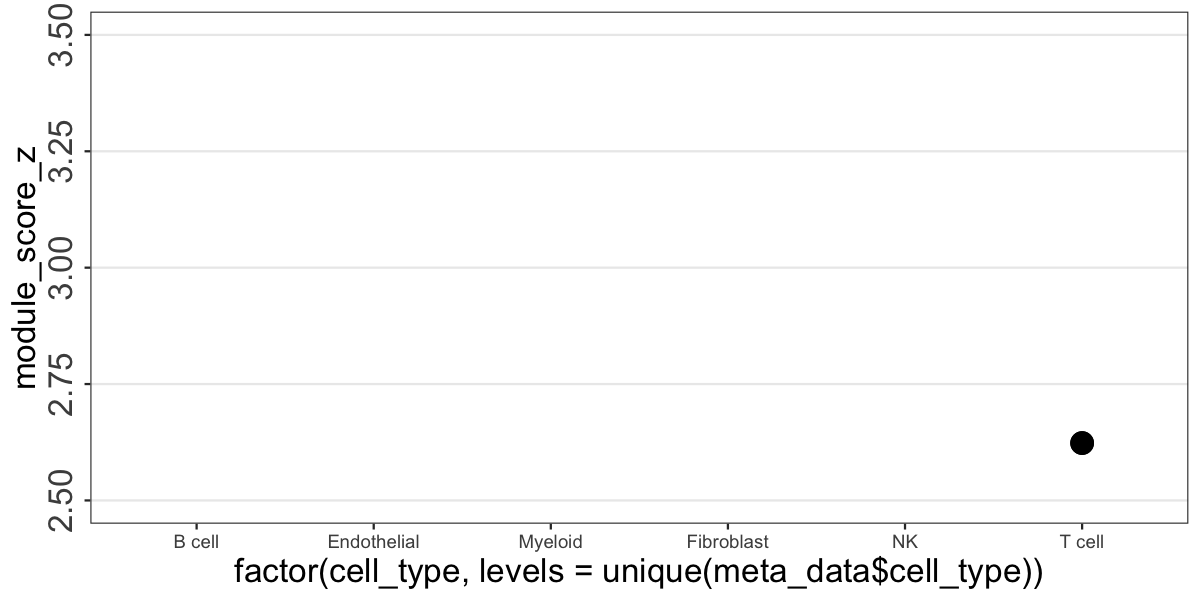

In [51]:

options(repr.plot.height = 5, repr.plot.width =10 ) #[meta_data$pval < 0.1,]
ggplot(scgwas_macro_old_graph, aes(x=factor(cell_type, levels=unique(meta_data$cell_type)), y=module_score_z))+ #fill=cell_type)) +
geom_point(size=6) +  geom_point(shape = 1,size = 6,colour = "black") +
#stat_summary(fun.data=data_summary) + #stat_summary(data=data2, fun.data=data_summary, color="grey40") + 
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      #axis.text.x = element_text(angle=90, size=15), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  + ylim(2.5, 3.5) 

ggplot(scgwas_macro_new_graph, aes(x=factor(cell_type, levels=unique(meta_data$cell_type)), y=module_score_z))+ #fill=cell_type)) +
geom_point(size=6) +  geom_point(shape = 1,size = 6,colour = "black") +
#stat_summary(fun.data=data_summary) + #stat_summary(data=data2, fun.data=data_summary, color="grey40") + 
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      #axis.text.x = element_text(angle=90, size=15), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))+ ylim(2.5, 3.5) 
#ggsave("~/Desktop/SC_GWAS_Bench/output/Final_figures/RA/scDRS_RA_macro_scGWAS_scores.pdf", height=5, width=10)

## Finer-grained cell states

In [60]:
# 10kb
scgwas_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/scGWAS/RA/10kb/"
scgwas_micro_old_10 <- fread(paste0(scgwas_dir, "RA_clusters.sig_module.txt"))
scgwas_micro_new_10 <- fread(paste0(scgwas_dir, "RA_clusters_newpath.sig_module.txt"))
# 50-30 kb
scgwas_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/scGWAS/RA/50_35/"
scgwas_micro_old <- fread(paste0(scgwas_dir, "RA_signif_clusters_2023.sig_module.txt"))
scgwas_micro_new <- fread("/Users/hopekirby/Desktop/SCRNA-GWAS-Benchmarking/output/scGWAS_Path/scGWAS_cluster_new_pathway.sig_module.txt", )

# create a table with the number of groups for each cell_type
scgwas_micro_old_count_10 <- data.frame(table(scgwas_micro_old_10$cell_type))
scgwas_micro_new_count_10 <- data.frame(table(scgwas_micro_new_10$cell_type))
scgwas_micro_old_count <- data.frame(table(scgwas_micro_old$cell_type))
scgwas_micro_new_count <- data.frame(table(scgwas_micro_new$cell_type))


replace_dict <- c("M-11: CD16+-DC4" = "M-11: CD16+/DC4", 'T-3: CD4+ Tfh-Tph' = 'T-3: CD4+ Tfh/Tph', 
                  'T-13: CD8+ GZMK-B+ memory' = 'T-13: CD8+ GZMK/B+ memory', 
                  'T-15: CD8+ GZMB+-TEMRA' = 'T-15: CD8+ GZMB+/TEMRA', 'T-16: CD8+ CD45ROlow-naive' = 'T-16: CD8+ CD45ROlow/naive', 
                  'T-17: CD8+ activated-NK-like' = 'T-17: CD8+ activated/NK-like', 
                 "B-0: CD24+CD27+CD11b+ switched memory" = "B-0: CD24+CD27+CD11b+\n switched memory", 
                 "B-1: CD24++CD27+IgM+ unswitched memory" = "B-1: CD24++CD27+IgM+\n unswitched memory")

# fix any misnames
Var2 <- c()
for (cluster in scgwas_micro_old_count$Var1) {
    if (cluster %in% names(replace_dict)) {
        Var2 <- c(Var2, replace_dict[cluster])
        }
    else {
        Var2 <- c(Var2, cluster)
        }
    }
scgwas_micro_old_count$Var1 <- Var2

Var2 <- c()
for (cluster in scgwas_micro_old_count_10$Var1) {
    if (cluster %in% names(replace_dict)) {
        Var2 <- c(Var2, replace_dict[cluster])
        }
    else {
        Var2 <- c(Var2, cluster)
        }
    }
scgwas_micro_old_count_10$Var1 <- Var2

# fix any misnames
Var2 <- c()
for (cluster in scgwas_micro_new_count$Var1) {
    if (cluster %in% names(replace_dict)) {
        Var2 <- c(Var2, replace_dict[cluster])
        }
    else {
        Var2 <- c(Var2, cluster)
        }
    }
scgwas_micro_new_count$Var1 <- Var2

# fix any misnames
Var2 <- c()
for (cluster in scgwas_micro_new_count_10$Var1) {
    if (cluster %in% names(replace_dict)) {
        Var2 <- c(Var2, replace_dict[cluster])
        }
    else {
        Var2 <- c(Var2, cluster)
        }
    }
scgwas_micro_new_count_10$Var1 <- Var2

# fix any misnames
Var2 <- c()
for (cluster in scgwas_micro_old$cell_type) {
    if (cluster %in% names(replace_dict)) {
        Var2 <- c(Var2, replace_dict[cluster])
        }
    else {
        Var2 <- c(Var2, cluster)
        }
    }
scgwas_micro_old$cell_type <- Var2

# fix any misnames
Var2 <- c()
for (cluster in scgwas_micro_old_10$cell_type) {
    if (cluster %in% names(replace_dict)) {
        Var2 <- c(Var2, replace_dict[cluster])
        }
    else {
        Var2 <- c(Var2, cluster)
        }
    }
scgwas_micro_old_10$cell_type <- Var2

# fix any misnames
Var2 <- c()
for (cluster in scgwas_micro_new$cell_type) {
    if (cluster %in% names(replace_dict)) {
        Var2 <- c(Var2, replace_dict[cluster])
        }
    else {
        Var2 <- c(Var2, cluster)
        }
    }
scgwas_micro_new$cell_type <- Var2

# fix any misnames
Var2 <- c()
for (cluster in scgwas_micro_new_10$cell_type) {
    if (cluster %in% names(replace_dict)) {
        Var2 <- c(Var2, replace_dict[cluster])
        }
    else {
        Var2 <- c(Var2, cluster)
        }
    }
scgwas_micro_new_10$cell_type <- Var2




In [61]:
sig_celltypes_10 = union(scgwas_micro_old_10$cell_type, scgwas_micro_new_10$cell_type)
sig_celltypes = union(scgwas_micro_old$cell_type, scgwas_micro_new$cell_type)
# add if not then
add_df <- data.frame(data.table("Var1"=setdiff(sig_celltypes, scgwas_micro_old_count$Var1), 
                                "Freq"=rep(0, length(setdiff(sig_celltypes, scgwas_micro_old_count$Var1)))))

scgwas_micro_old_count <- rbind(scgwas_micro_old_count, add_df)    

# add if not then
add_df <- data.frame(data.table("Var1"=setdiff(sig_celltypes, scgwas_micro_new_count$Var1), 
                                "Freq"=rep(0, length(setdiff(sig_celltypes, scgwas_micro_new_count$Var1)))))

scgwas_micro_new_count <- rbind(scgwas_micro_new_count, add_df) 

# add if not then
add_df <- data.frame(data.table("Var1"=setdiff(sig_celltypes_10, scgwas_micro_old_count_10$Var1), 
                                "Freq"=rep(0, length(setdiff(sig_celltypes_10, scgwas_micro_old_count_10$Var1)))))

scgwas_micro_old_count_10 <- rbind(scgwas_micro_old_count_10, add_df)    

# add if not then
add_df <- data.frame(data.table("Var1"=setdiff(sig_celltypes_10, scgwas_micro_new_count_10$Var1), 
                                "Freq"=rep(0, length(setdiff(sig_celltypes_10, scgwas_micro_new_count_10$Var1)))))

scgwas_micro_new_count_10 <- rbind(scgwas_micro_new_count_10, add_df) 


In [64]:
# ensure names are correct
length(setdiff(scgwas_micro_old_count$Var1, names(meta_colors)))
length(setdiff(scgwas_micro_new_count$Var1, names(meta_colors)))
length(setdiff(scgwas_micro_old$cell_type, names(meta_colors)))
length(setdiff(scgwas_micro_new$cell_type, names(meta_colors)))

length(setdiff(scgwas_micro_old_count_10$Var1, names(meta_colors_clean)))
length(setdiff(scgwas_micro_new_count_10$Var1, names(meta_colors_clean)))
length(setdiff(scgwas_micro_old_10$cell_type, names(meta_colors_clean)))
length(setdiff(scgwas_micro_new_10$cell_type, names(meta_colors_clean)))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [65]:
colnames(meta_data)

[1] "sample"                   "cell"                    
 [3] "cluster_number"           "cluster_name"            
 [5] "cell_type"                "subject_id"              
 [7] "percent.mito"             "nGene"                   
 [9] "nUMI"                     "redcap_data_access_group"
[11] "age"                      "sex"                     
[13] "RA_duration_years"        "Race_white"

In [66]:
scgwas_micro_old_graph_10 <- scgwas_micro_old_10[,c("cell_type", "module_score_z")]
scgwas_micro_new_graph_10 <- scgwas_micro_new_10[,c("cell_type", "module_score_z")]
scgwas_micro_old_graph <- scgwas_micro_old[,c("cell_type", "module_score_z")]
scgwas_micro_new_graph <- scgwas_micro_new[,c("cell_type", "module_score_z")]


length(intersect(scgwas_micro_old$cell_type, scgwas_micro_new$cell_type))
length(setdiff(scgwas_micro_old$cell_type, scgwas_micro_new$cell_type))
length(setdiff(scgwas_micro_new$cell_type, scgwas_micro_old$cell_type))

# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(names(meta_colors_clean), scgwas_micro_old$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(names(meta_colors_clean), scgwas_micro_old$cell_type)))))

scgwas_micro_old_graph <- rbind(scgwas_micro_old_graph, add_df)    

# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(names(meta_colors_clean), scgwas_micro_new$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(names(meta_colors_clean), scgwas_micro_new$cell_type)))))

scgwas_micro_new_graph <- rbind(scgwas_micro_new_graph, add_df) 


# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(names(meta_colors_clean), scgwas_micro_old_10$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(names(meta_colors_clean), scgwas_micro_old_10$cell_type)))))

scgwas_micro_old_graph_10 <- rbind(scgwas_micro_old_graph_10, add_df)    

# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(names(meta_colors_clean), scgwas_micro_new_10$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(names(meta_colors_clean), scgwas_micro_new_10$cell_type)))))

scgwas_micro_new_graph_10 <- rbind(scgwas_micro_new_graph_10, add_df) 




[1] 22

[1] 14

[1] 0

#### Get ranked colors

In [67]:
# list to add the ranked clusters within cell types for proper order
micro_table <- fread("~/Downloads/scpgwas/scdrs/RA/RA_10kb/RA.scdrs_group.cell_type")
micro_table[micro_table$group == "B-0: CD24+CD27+CD11b+ switched memory",]$group <- "B-0: CD24+CD27+CD11b+\n switched memory"
micro_table[micro_table$group == "B-1: CD24++CD27+IgM+ unswitched memory",]$group <- "B-1: CD24++CD27+IgM+\n unswitched memory"
ranked_cell_clusters <- c()
for (cell_type in meta_colors1_clean) {
    # get the ranked cells in that group
    data <- micro_table[micro_table$group %in% names(cell_type),]
    data <- data[order(assoc_mcz),]
    # now add the ranked cells to a list
    ranked_cell_clusters <- c(ranked_cell_clusters, data$group)
    } 
ranked_cell_clusters

[1] "F-2: CD34+ sublining"                    
 [2] "F-7: NOTCH3+ sublining"                  
 [3] "B-8: IgG1+IgG3+ plasma"                  
 [4] "B-6: IgM+ plasma"                        
 [5] "B-7: HLA-DR+IgG+ plasmablast"            
 [6] "B-2: IgM+IgD+TCL1A+ naive"               
 [7] "B-1: CD24++CD27+IgM+\n unswitched memory"
 [8] "B-3: IgM+IgD+CD1c+ MZ-like"              
 [9] "B-0: CD24+CD27+CD11b+\n switched memory" 
[10] "B-4: AICDA+BCL6+ GC-like"                
[11] "B-5: CD11c+LAMP1+ ABC"                   
[12] "M-8: PLCG2+"                             
[13] "M-5: C1QA+"                              
[14] "M-7: IL1B+ FCN1+ HBEGF+"                 
[15] "M-13: pDC"                               
[16] "M-11: CD16+/DC4"                         
[17] "M-6: STAT1+ CXCL10+"                     
[18] "M-9: DC3"                                
[19] "M-4: SPP1+"                              
[20] "M-10: DC2"                               
[21] "M-2: MERTK+ S100A8+"                     
[22] "M-12: DC1"                               
[23] "M-14: LAMP3+"                            
[24] "M-0: MERTK+ SELENOP+ LYVE1+"             
[25] "M-3: MERTK+ HBEGF+"                      
[26] "M-1: MERTK+ SELENOP+ LYVE1-"             
[27] "NK-8: CD56bright CD16- IFN response"     
[28] "NK-9: MT-high"                           
[29] "NK-11: MKI67+ Proliferating"             
[30] "NK-3: CD56dim CD16+ GZMB-"               
[31] "NK-4: CD56bright CD16- GZMA+CD160+"      
[32] "NK-2: CD56dim CD16+ IFNG+CD160-"         
[33] "NK-6: CD56bright CD16- GNLY+"            
[34] "NK-12: IL7R+ ILC"                        
[35] "NK-0: CD56dim CD16+ IFNG-"               
[36] "NK-1: CD56dim CD16+ IFNG+CD160+"         
[37] "NK-5: CD56bright CD16- GZMA+CD69+"       
[38] "NK-7: CD56bright CD16- GNLY+CD69+"       
[39] "NK-10: PCNA+ Proliferating"              
[40] "NK-13: IL7R+CD161+ ILC"                  
[41] "T-19: MT-high (low quality)"             
[42] "T-22: Vdelta1"                           
[43] "T-12: CD4+ GNLY+"                        
[44] "T-23: Vdelta2"                           
[45] "T-15: CD8+ GZMB+/TEMRA"                  
[46] "T-14: CD8+ GZMK+ memory"                 
[47] "T-16: CD8+ CD45ROlow/naive"              
[48] "T-4: CD4+ naive"                         
[49] "T-5: CD4+ GZMK+ memory"                  
[50] "T-21: Innate-like"                       
[51] "T-17: CD8+ activated/NK-like"            
[52] "T-13: CD8+ GZMK/B+ memory"               
[53] "T-9: CD4+ CD25-low Treg"                 
[54] "T-0: CD4+ IL7R+ memory"                  
[55] "T-2: CD4+ IL7R+CCR5+ memory"             
[56] "T-1: CD4+ CD161+ memory"                 
[57] "T-3: CD4+ Tfh/Tph"                       
[58] "T-6: CD4+ memory"                        
[59] "T-18: Proliferating"                     
[60] "T-7: CD4+ Tph"                           
[61] "T-10: CD4+ OX40+NR3C1+"                  
[62] "T-11: CD4+ CD146+ memory"                
[63] "T-20: CD38+"                             
[64] "T-8: CD4+ CD25-high Treg"

In [68]:
length(sig_celltypes)
sig_celltypes
# get the same order as the meta_colors
sig_celltypes = intersect(ranked_cell_clusters, sig_celltypes)
length(sig_celltypes)

length(sig_celltypes_10)
sig_celltypes_10
# get the same order as the meta_colors
sig_celltypes_10 = intersect(ranked_cell_clusters, sig_celltypes_10)
length(sig_celltypes_10)

[1] 36

[1] "B-2: IgM+IgD+TCL1A+ naive"           "B-3: IgM+IgD+CD1c+ MZ-like"         
 [3] "B-4: AICDA+BCL6+ GC-like"            "M-11: CD16+/DC4"                    
 [5] "NK-0: CD56dim CD16+ IFNG-"           "NK-13: IL7R+CD161+ ILC"             
 [7] "NK-2: CD56dim CD16+ IFNG+CD160-"     "NK-3: CD56dim CD16+ GZMB-"          
 [9] "NK-4: CD56bright CD16- GZMA+CD160+"  "NK-6: CD56bright CD16- GNLY+"       
[11] "NK-7: CD56bright CD16- GNLY+CD69+"   "NK-8: CD56bright CD16- IFN response"
[13] "NK-9: MT-high"                       "T-0: CD4+ IL7R+ memory"             
[15] "T-1: CD4+ CD161+ memory"             "T-10: CD4+ OX40+NR3C1+"             
[17] "T-11: CD4+ CD146+ memory"            "T-12: CD4+ GNLY+"                   
[19] "T-13: CD8+ GZMK/B+ memory"           "T-14: CD8+ GZMK+ memory"            
[21] "T-15: CD8+ GZMB+/TEMRA"              "T-16: CD8+ CD45ROlow/naive"         
[23] "T-17: CD8+ activated/NK-like"        "T-18: Proliferating"                
[25] "T-19: MT-high (low quality)"         "T-2: CD4+ IL7R+CCR5+ memory"        
[27] "T-20: CD38+"                         "T-21: Innate-like"                  
[29] "T-23: Vdelta2"                       "T-3: CD4+ Tfh/Tph"                  
[31] "T-4: CD4+ naive"                     "T-5: CD4+ GZMK+ memory"             
[33] "T-6: CD4+ memory"                    "T-7: CD4+ Tph"                      
[35] "T-8: CD4+ CD25-high Treg"            "T-9: CD4+ CD25-low Treg"

[1] 36

[1] 27

[1] "B-0: CD24+CD27+CD11b+\n switched memory" 
 [2] "B-1: CD24++CD27+IgM+\n unswitched memory"
 [3] "B-2: IgM+IgD+TCL1A+ naive"               
 [4] "B-3: IgM+IgD+CD1c+ MZ-like"              
 [5] "B-4: AICDA+BCL6+ GC-like"                
 [6] "B-5: CD11c+LAMP1+ ABC"                   
 [7] "M-13: pDC"                               
 [8] "NK-0: CD56dim CD16+ IFNG-"               
 [9] "NK-3: CD56dim CD16+ GZMB-"               
[10] "NK-4: CD56bright CD16- GZMA+CD160+"      
[11] "NK-9: MT-high"                           
[12] "T-10: CD4+ OX40+NR3C1+"                  
[13] "T-13: CD8+ GZMK/B+ memory"               
[14] "T-14: CD8+ GZMK+ memory"                 
[15] "T-15: CD8+ GZMB+/TEMRA"                  
[16] "T-16: CD8+ CD45ROlow/naive"              
[17] "T-17: CD8+ activated/NK-like"            
[18] "T-18: Proliferating"                     
[19] "T-19: MT-high (low quality)"             
[20] "T-2: CD4+ IL7R+CCR5+ memory"             
[21] "T-20: CD38+"                             
[22] "T-22: Vdelta1"                           
[23] "T-3: CD4+ Tfh/Tph"                       
[24] "T-5: CD4+ GZMK+ memory"                  
[25] "T-7: CD4+ Tph"                           
[26] "T-8: CD4+ CD25-high Treg"                
[27] "NK-2: CD56dim CD16+ IFNG+CD160-"

[1] 27

Warning message:
“Removed 14 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 14 rows containing missing values or values outside the scale range
(`geom_point()`).”


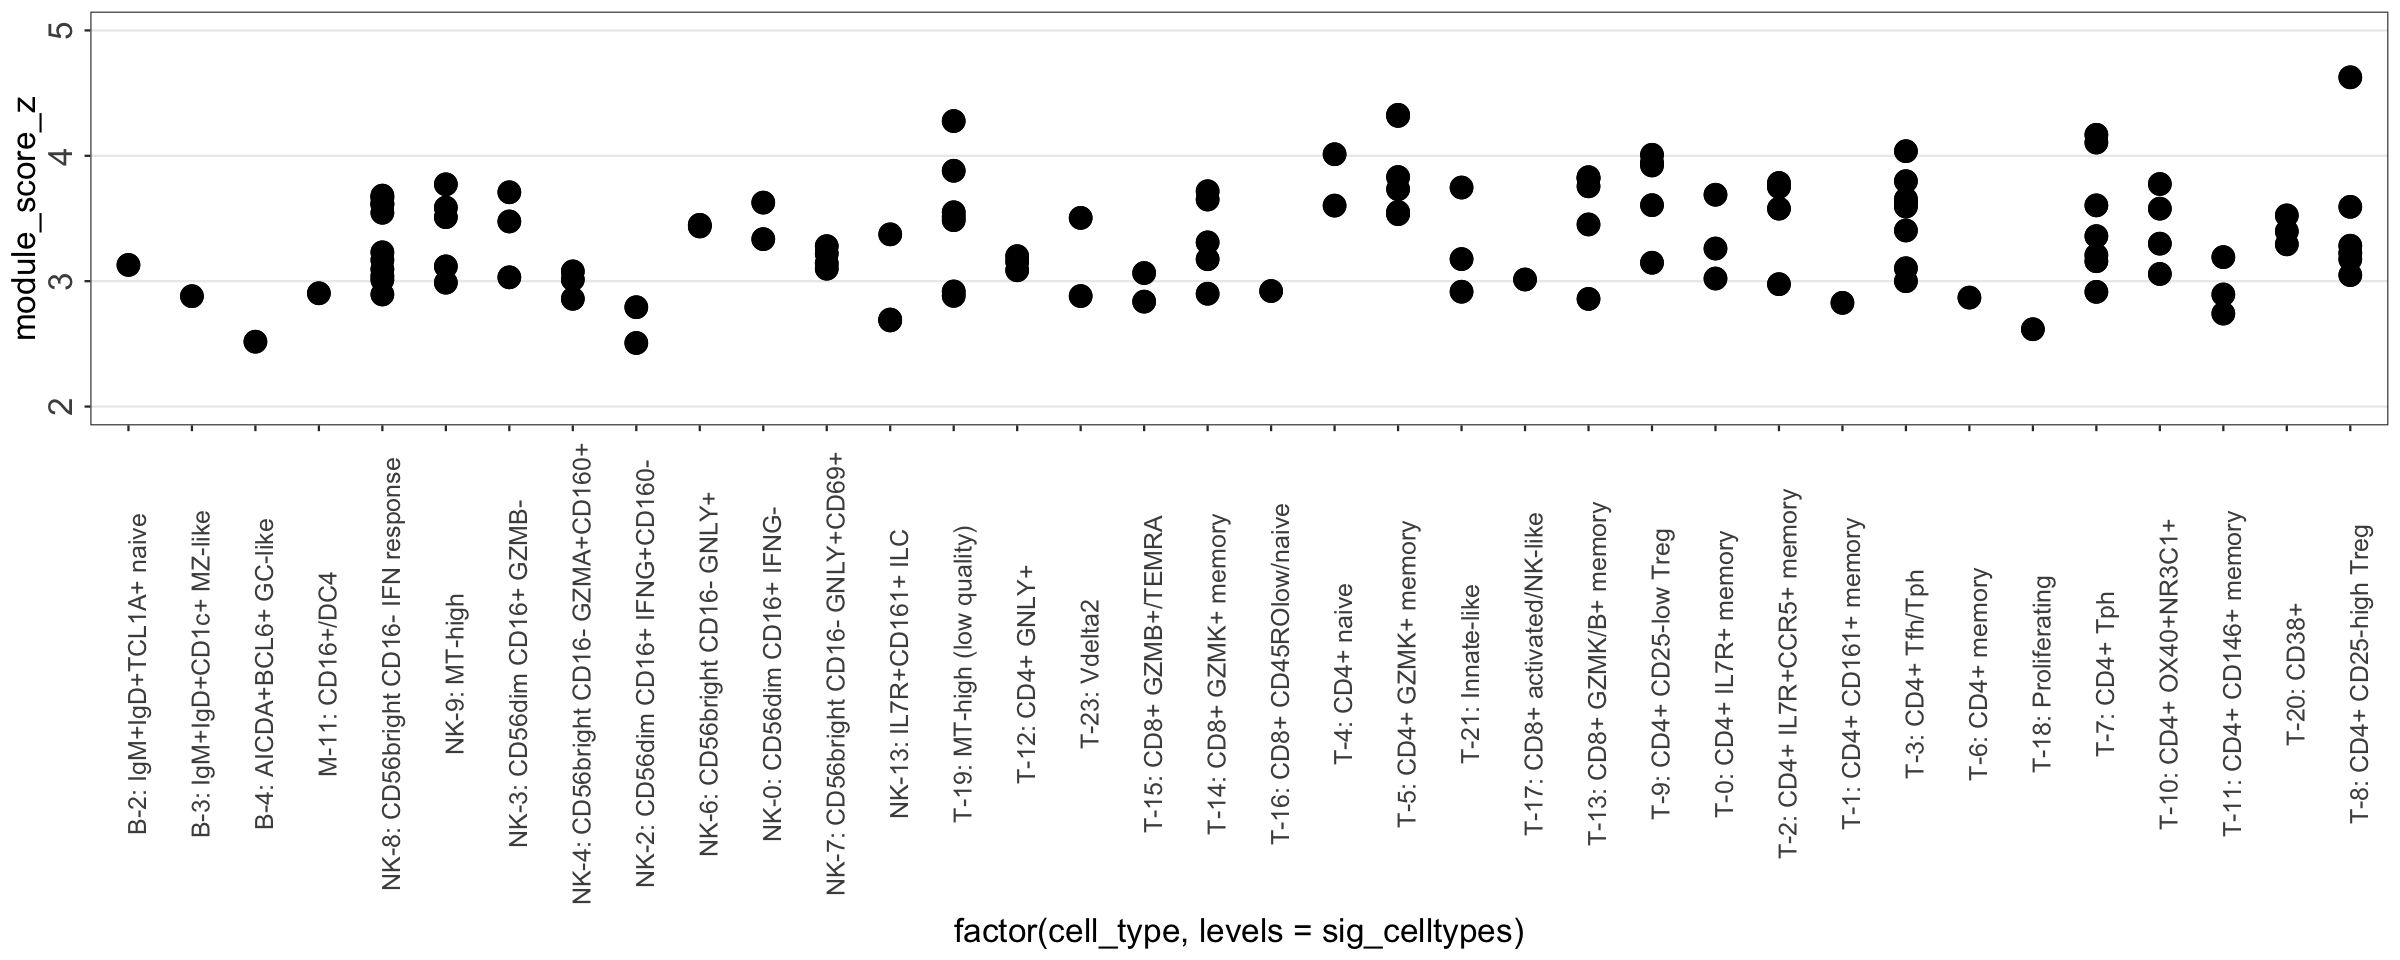

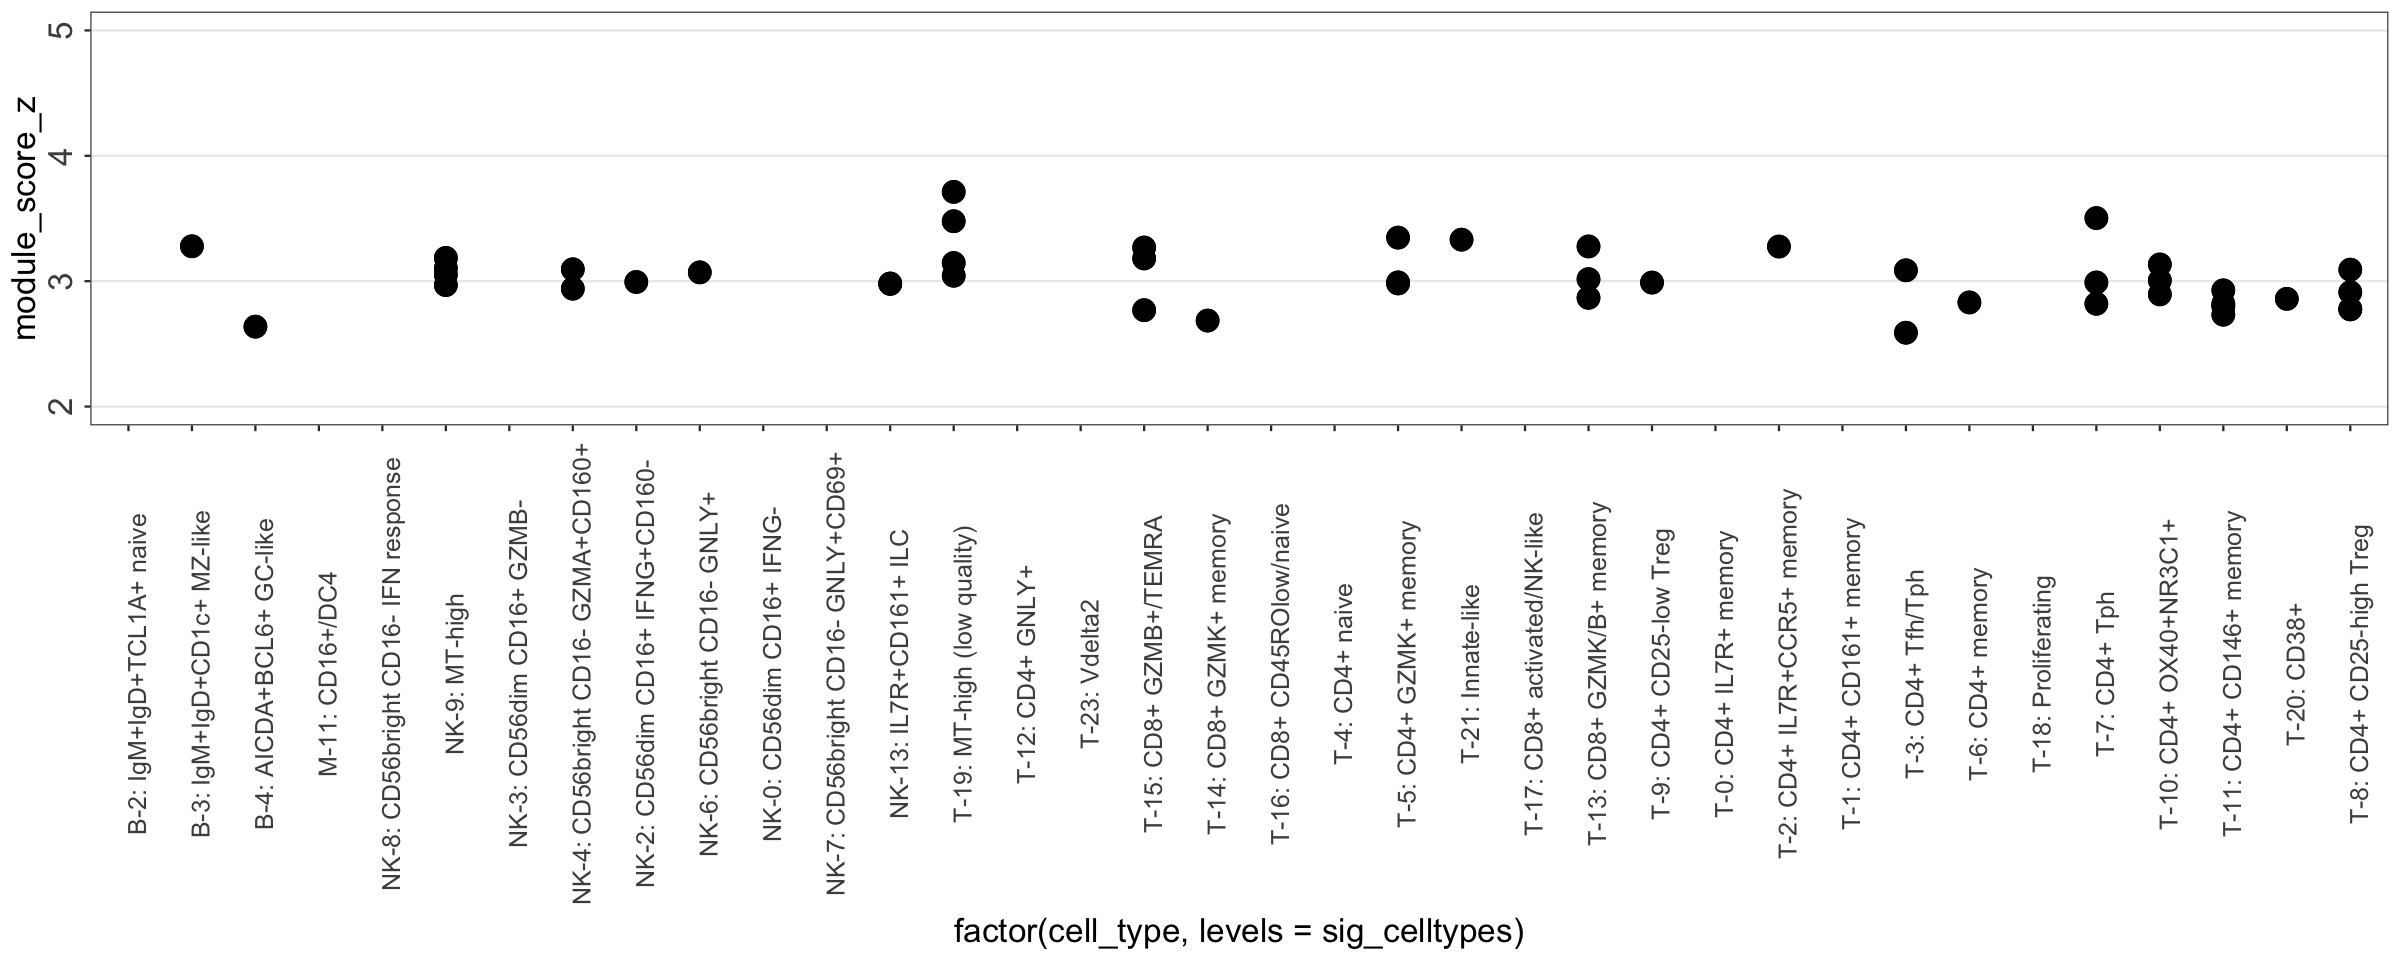

In [69]:

options(repr.plot.height = 8, repr.plot.width =20 ) #[meta_data$pval < 0.1,]
ggplot(scgwas_micro_old_graph[scgwas_micro_old_graph$cell_type %in% sig_celltypes,], aes(x=factor(cell_type, levels=sig_celltypes), y=module_score_z))+ #fill=cell_type)) +
geom_point(size=6) +  geom_point(shape = 1,size = 6,colour = "black") +
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      axis.text.x = element_text(angle=90, size=15), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  + ylim(2, 5)

ggplot(scgwas_micro_new_graph[scgwas_micro_new_graph$cell_type %in% sig_celltypes,], aes(x=factor(cell_type, levels=sig_celltypes), y=module_score_z))+ #fill=cell_type)) +
geom_point(size=6) +  geom_point(shape = 1,size = 6,colour = "black") +
#stat_summary(fun.data=data_summary) + #stat_summary(data=data2, fun.data=data_summary, color="grey40") + 
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      axis.text.x = element_text(angle=90, size=15), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin())) + ylim(2, 5)
#ggsave("~/Desktop/SC_GWAS_Bench/output/Final_figures/RA/scDRS_RA_macro_scGWAS_scores.pdf", height=5, width=10)

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 19 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 19 rows containing missing values or values outside the scale range
(`geom_point()`).”


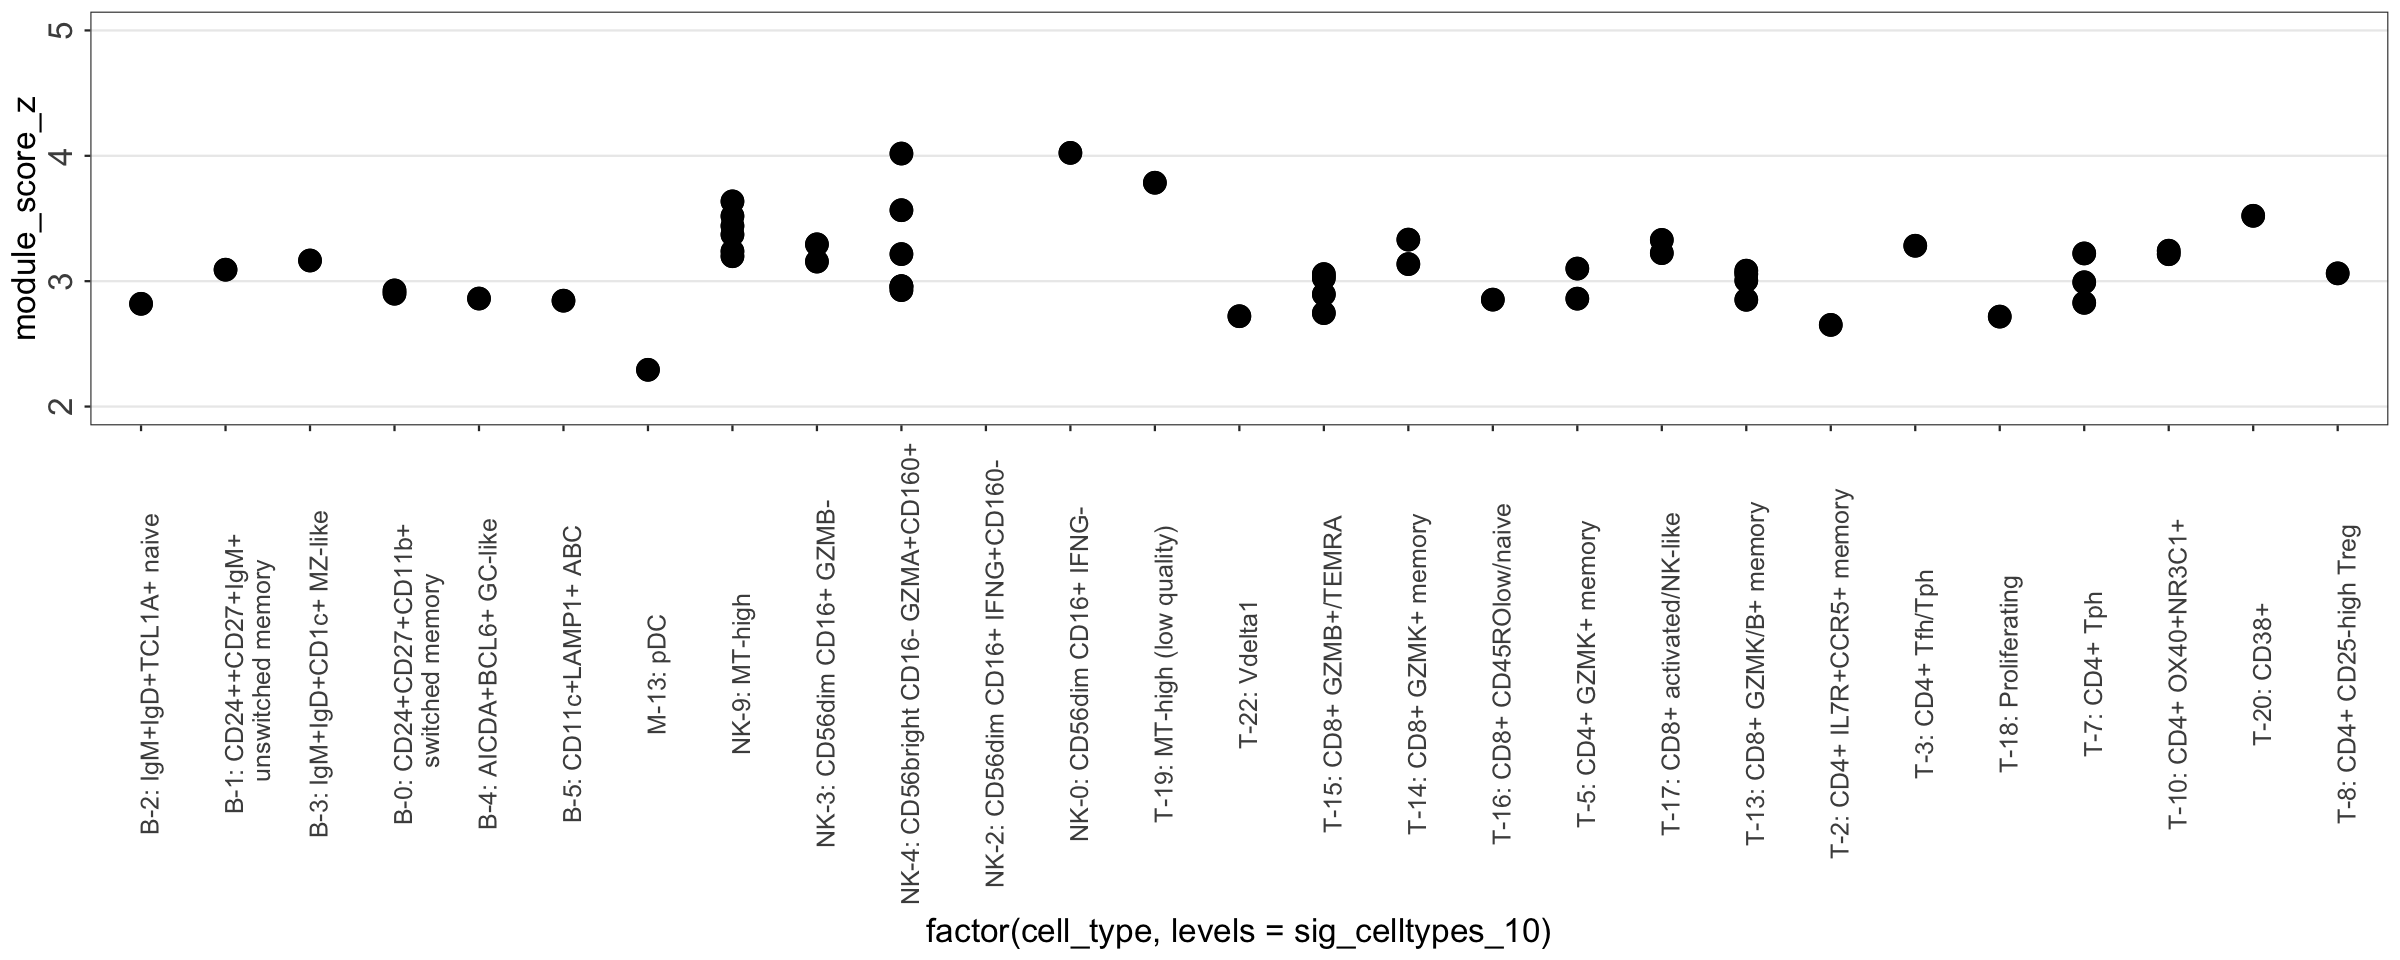

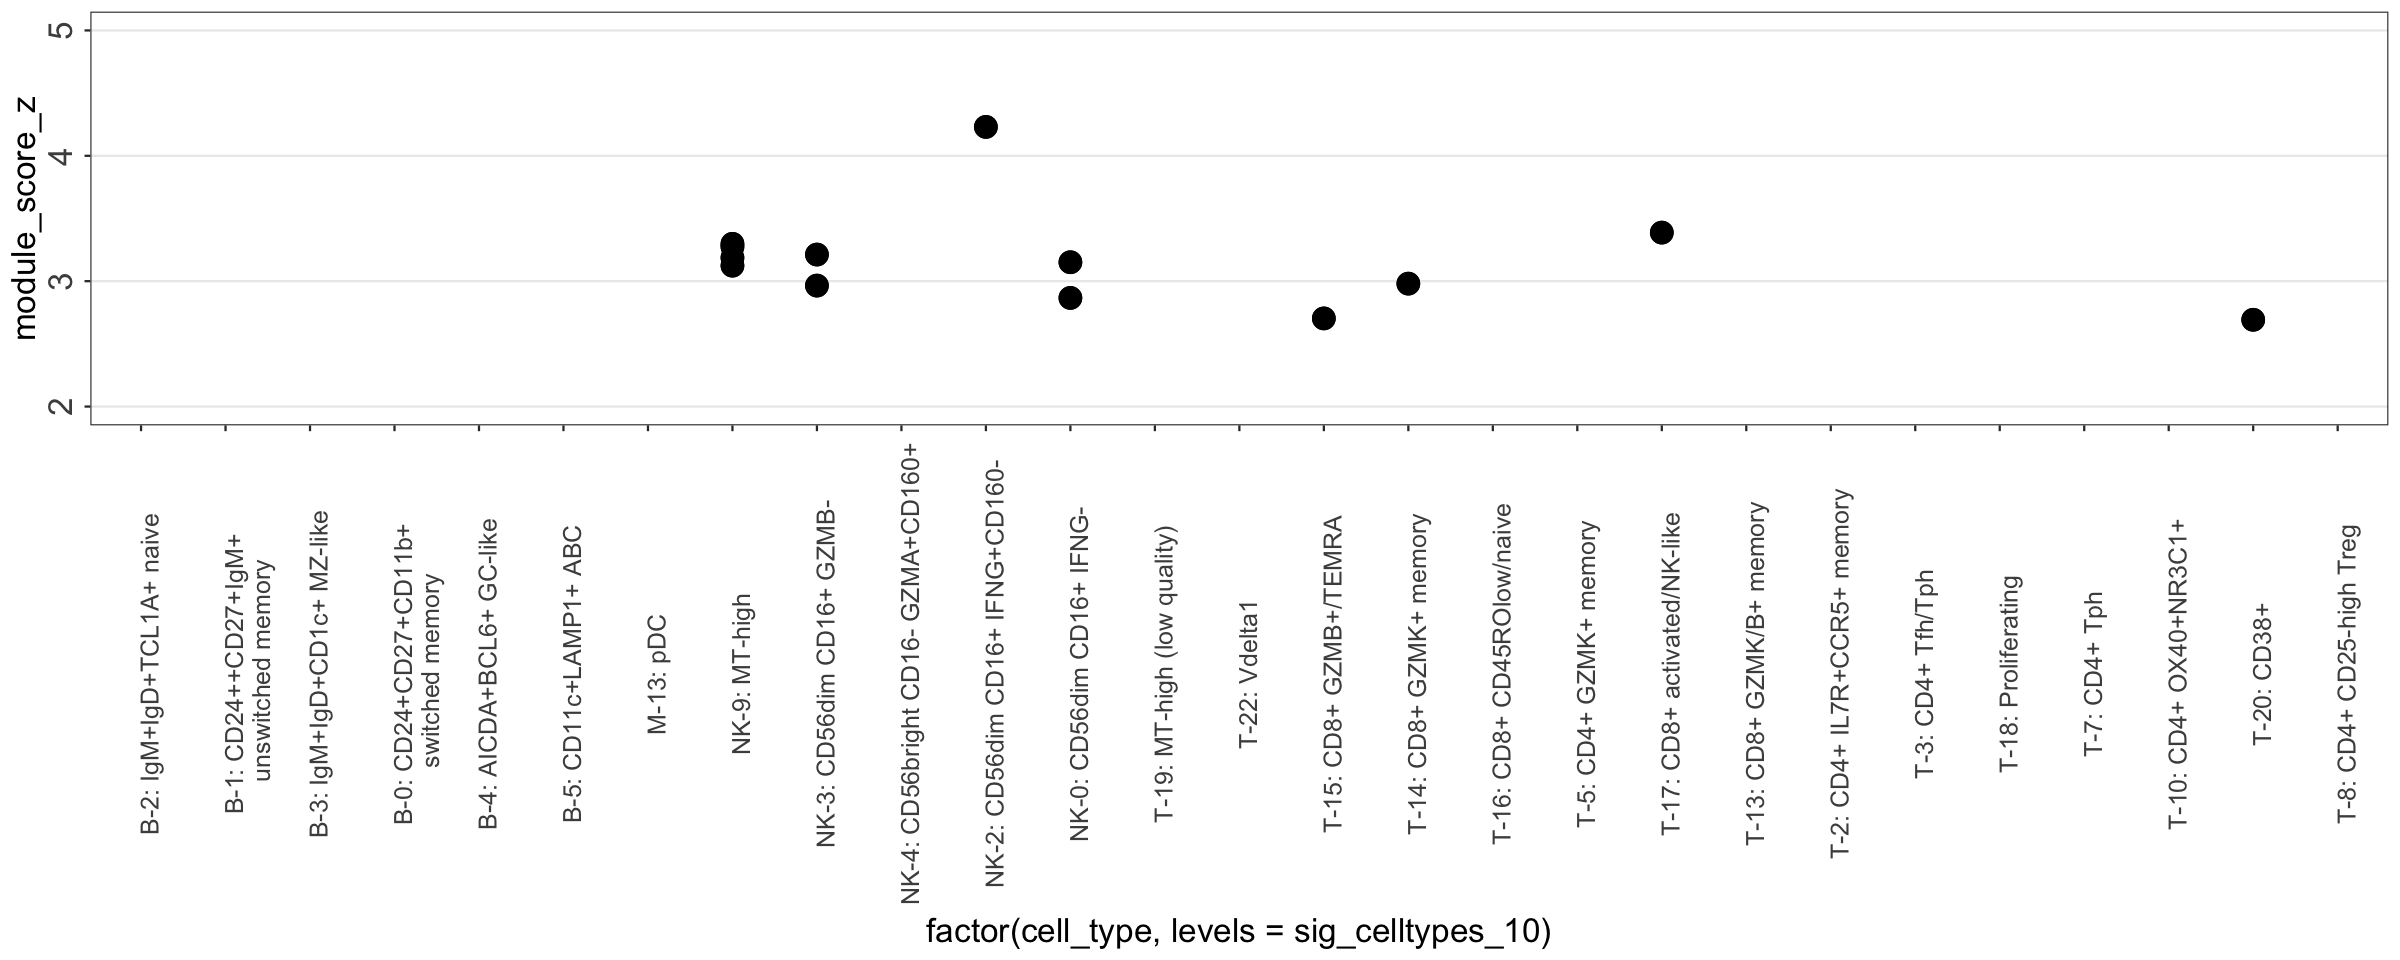

In [70]:

options(repr.plot.height = 8, repr.plot.width =20 ) #[meta_data$pval < 0.1,]
ggplot(scgwas_micro_old_graph_10[scgwas_micro_old_graph_10$cell_type %in% sig_celltypes_10,], aes(x=factor(cell_type, levels=sig_celltypes_10), y=module_score_z))+ #fill=cell_type)) +
geom_point(size=6) +  geom_point(shape = 1,size = 6,colour = "black") +
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      axis.text.x = element_text(angle=90, size=15), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  + ylim(2, 5)

ggplot(scgwas_micro_new_graph_10[scgwas_micro_new_graph_10$cell_type %in% sig_celltypes_10,], aes(x=factor(cell_type, levels=sig_celltypes_10), y=module_score_z))+ #fill=cell_type)) +
geom_point(size=6) +  geom_point(shape = 1,size = 6,colour = "black") +
#stat_summary(fun.data=data_summary) + #stat_summary(data=data2, fun.data=data_summary, color="grey40") + 
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      axis.text.x = element_text(angle=90, size=15), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin())) + ylim(2, 5)
#ggsave("~/Desktop/SC_GWAS_Bench/output/Final_figures/RA/scDRS_RA_macro_scGWAS_scores.pdf", height=5, width=10)

## Do based on number of gene modules  now

In [71]:
scgwas_micro_old_count[1:2,]
dim(scgwas_micro_old_count)
dim(scgwas_micro_new_count)

Var1                       Freq
1 B-2: IgM+IgD+TCL1A+ naive  1   
2 B-3: IgM+IgD+CD1c+ MZ-like 1

[1] 36  2

[1] 36  2

In [72]:
unique(scgwas_micro_new_count$Freq)
unique(scgwas_micro_old_count$Freq)
sort(union(unique(scgwas_micro_new_count$Freq),
unique(scgwas_micro_old_count$Freq)))
print("10kb")
unique(scgwas_micro_new_count_10$Freq)
unique(scgwas_micro_old_count_10$Freq)
sort(union(unique(scgwas_micro_new_count_10$Freq),
unique(scgwas_micro_old_count_10$Freq)))

[1] 1 2 4 3 0

[1]  1  2  3  4 11  5  7  9  6

[1]  0  1  2  3  4  5  6  7  9 11

[1] "10kb"


[1] 2 1 4 0

[1] 2 1 6 4 3 0

[1] 0 1 2 3 4 6

In [73]:
# for each, get the maximum module Z score
max_scores = c()
for (group in scgwas_micro_old_count$Var1) {
    # get the max zscore from the scgwas_micro
    filt = scgwas_micro_old[scgwas_micro_old$cell_type == group,]
    if (nrow(filt) == 0) {
        cat("\n", group)
        stop("Problem") }  else {
        max_scores = c(max_scores, max(filt$module_score_z))
        }
    }
length(max_scores)
dim(scgwas_micro_old_count)
scgwas_micro_old_count$Max_Zscore = max_scores


max_scores = c()
for (group in scgwas_micro_new_count$Var1) {
    # get the max zscore from the scgwas_micro
    filt = scgwas_micro_new[scgwas_micro_new$cell_type == group,]
    if (nrow(filt) == 0) {
        max_scores = c(max_scores, 0)
        }  else {
        max_scores = c(max_scores, max(filt$module_score_z))
        }
    }
scgwas_micro_new_count$Max_Zscore = max_scores

[1] 36

[1] 36  2

In [75]:
setdiff(scgwas_micro_old_count$Var1, scgwas_micro_old$cell_type)
setdiff(scgwas_micro_old_count_10$Var1, scgwas_micro_old_10$cell_type)

character(0)

[1] "NK-2: CD56dim CD16+ IFNG+CD160-"

In [91]:
unique(scgwas_micro_old_10$cell_type)
scgwas_micro_old_10[1:2,]

[1] "B-0: CD24+CD27+CD11b+\n switched memory" 
 [2] "B-1: CD24++CD27+IgM+\n unswitched memory"
 [3] "B-2: IgM+IgD+TCL1A+ naive"               
 [4] "B-3: IgM+IgD+CD1c+ MZ-like"              
 [5] "B-4: AICDA+BCL6+ GC-like"                
 [6] "B-5: CD11c+LAMP1+ ABC"                   
 [7] "M-13: pDC"                               
 [8] "NK-0: CD56dim CD16+ IFNG-"               
 [9] "NK-3: CD56dim CD16+ GZMB-"               
[10] "NK-4: CD56bright CD16- GZMA+CD160+"      
[11] "NK-9: MT-high"                           
[12] "T-10: CD4+ OX40+NR3C1+"                  
[13] "T-13: CD8+ GZMK/B+ memory"               
[14] "T-14: CD8+ GZMK+ memory"                 
[15] "T-15: CD8+ GZMB+/TEMRA"                  
[16] "T-16: CD8+ CD45ROlow/naive"              
[17] "T-17: CD8+ activated/NK-like"            
[18] "T-18: Proliferating"                     
[19] "T-19: MT-high (low quality)"             
[20] "T-2: CD4+ IL7R+CCR5+ memory"             
[21] "T-20: CD38+"                             
[22] "T-22: Vdelta1"                           
[23] "T-3: CD4+ Tfh/Tph"                       
[24] "T-5: CD4+ GZMK+ memory"                  
[25] "T-7: CD4+ Tph"                           
[26] "T-8: CD4+ CD25-high Treg"

module_genes                seed    edges                   module_score
1 ACTR2:CORO1A:DDX6:REL:SFPQ  TMEM243 104437:104453:8245:8377 10.35609    
2 ACTR2:CORO1A:DDX6:REL:SRRM2 MAVS    104437:8245:104475:8398 10.32359    
  m_gwas   m_scrnaseq module_score_z z_gwas   z_scrnaseq
1 7.881833 4.714150   2.926205       2.273809 1.857144  
2 7.624393 4.739278   2.900136       2.099648 1.889936  
  cell_type                               trait panel p           p_gwas    
1 B-0: CD24+CD27+CD11b+\n switched memory RA    RA    0.000924428 0.02796395
2 B-0: CD24+CD27+CD11b+\n switched memory RA    RA    0.001155535 0.03697712
  p_scrn    
1 0.03559048
2 0.03119945

In [92]:
# for each, get the maximum module Z score
max_scores = c()
for (group in scgwas_micro_old_count_10$Var1) {
    # get the max zscore from the scgwas_micro
    filt = scgwas_micro_old_10[scgwas_micro_old_10$cell_type == group,]
    if (nrow(filt) == 0) {
        print(group)
        max_scores = c(max_scores, 0)
        }  else {
        max_scores = c(max_scores, max(filt$module_score_z))
        }
    }
length(max_scores)
dim(scgwas_micro_old_count_10)
scgwas_micro_old_count_10$Max_Zscore = max_scores


max_scores = c()
for (group in scgwas_micro_new_count_10$Var1) {
    # get the max zscore from the scgwas_micro
    filt = scgwas_micro_new_10[scgwas_micro_new_10$cell_type == group,]
    if (nrow(filt) == 0) {
        max_scores = c(max_scores, 0)
        }  else {
        max_scores = c(max_scores, max(filt$module_score_z))
        }
    }
scgwas_micro_new_count_10$Max_Zscore = max_scores

[1] "NK-2: CD56dim CD16+ IFNG+CD160-"


[1] 27

[1] 27  3

In [93]:
scgwas_micro_old_count_10[1:2,]

Var1                                     Freq Max_Zscore
1 B-0: CD24+CD27+CD11b+\n switched memory  2    2.926205  
2 B-1: CD24++CD27+IgM+\n unswitched memory 1    3.091584

In [80]:
library(RColorBrewer)
brewer.pal(6, "YlGnBu")
backup_colors=c("1"='#FFFFD9', "2"='#EDF8B1', "3"='#C7E9B4', 
                "4"='#7FCDBB', "5"="#41B6C4", "6"="#1D91C0", 
                "7"='#7FCDBB',  "9"='#253494', "11"='#081D58', "0"="white")
backup_colors_10=c("1"='#FFFFCC', "2"='#C7E9B4', "3"='#7FCDBB', 
                "4"='#41B6C4', "5"='#2C7FB8', "6"='#253494', "0"="white")


[1] "#FFFFCC" "#C7E9B4" "#7FCDBB" "#41B6C4" "#2C7FB8" "#253494"

In [88]:
scgwas_micro_old_count_10[1:2,]
setdiff(scgwas_micro_old_count_10$Var1, names(exp_colors_clean))

Var1                                     Freq Max_Zscore
1 B-0: CD24+CD27+CD11b+\n switched memory  2    2.926205  
2 B-1: CD24++CD27+IgM+\n unswitched memory 1    3.091584

character(0)

In [108]:
dim(filt)
dim(scgwas_micro_old_count_10[scgwas_micro_old_count_10$Max_Zscore !=0,])

[1] 0 3

[1] 26  3

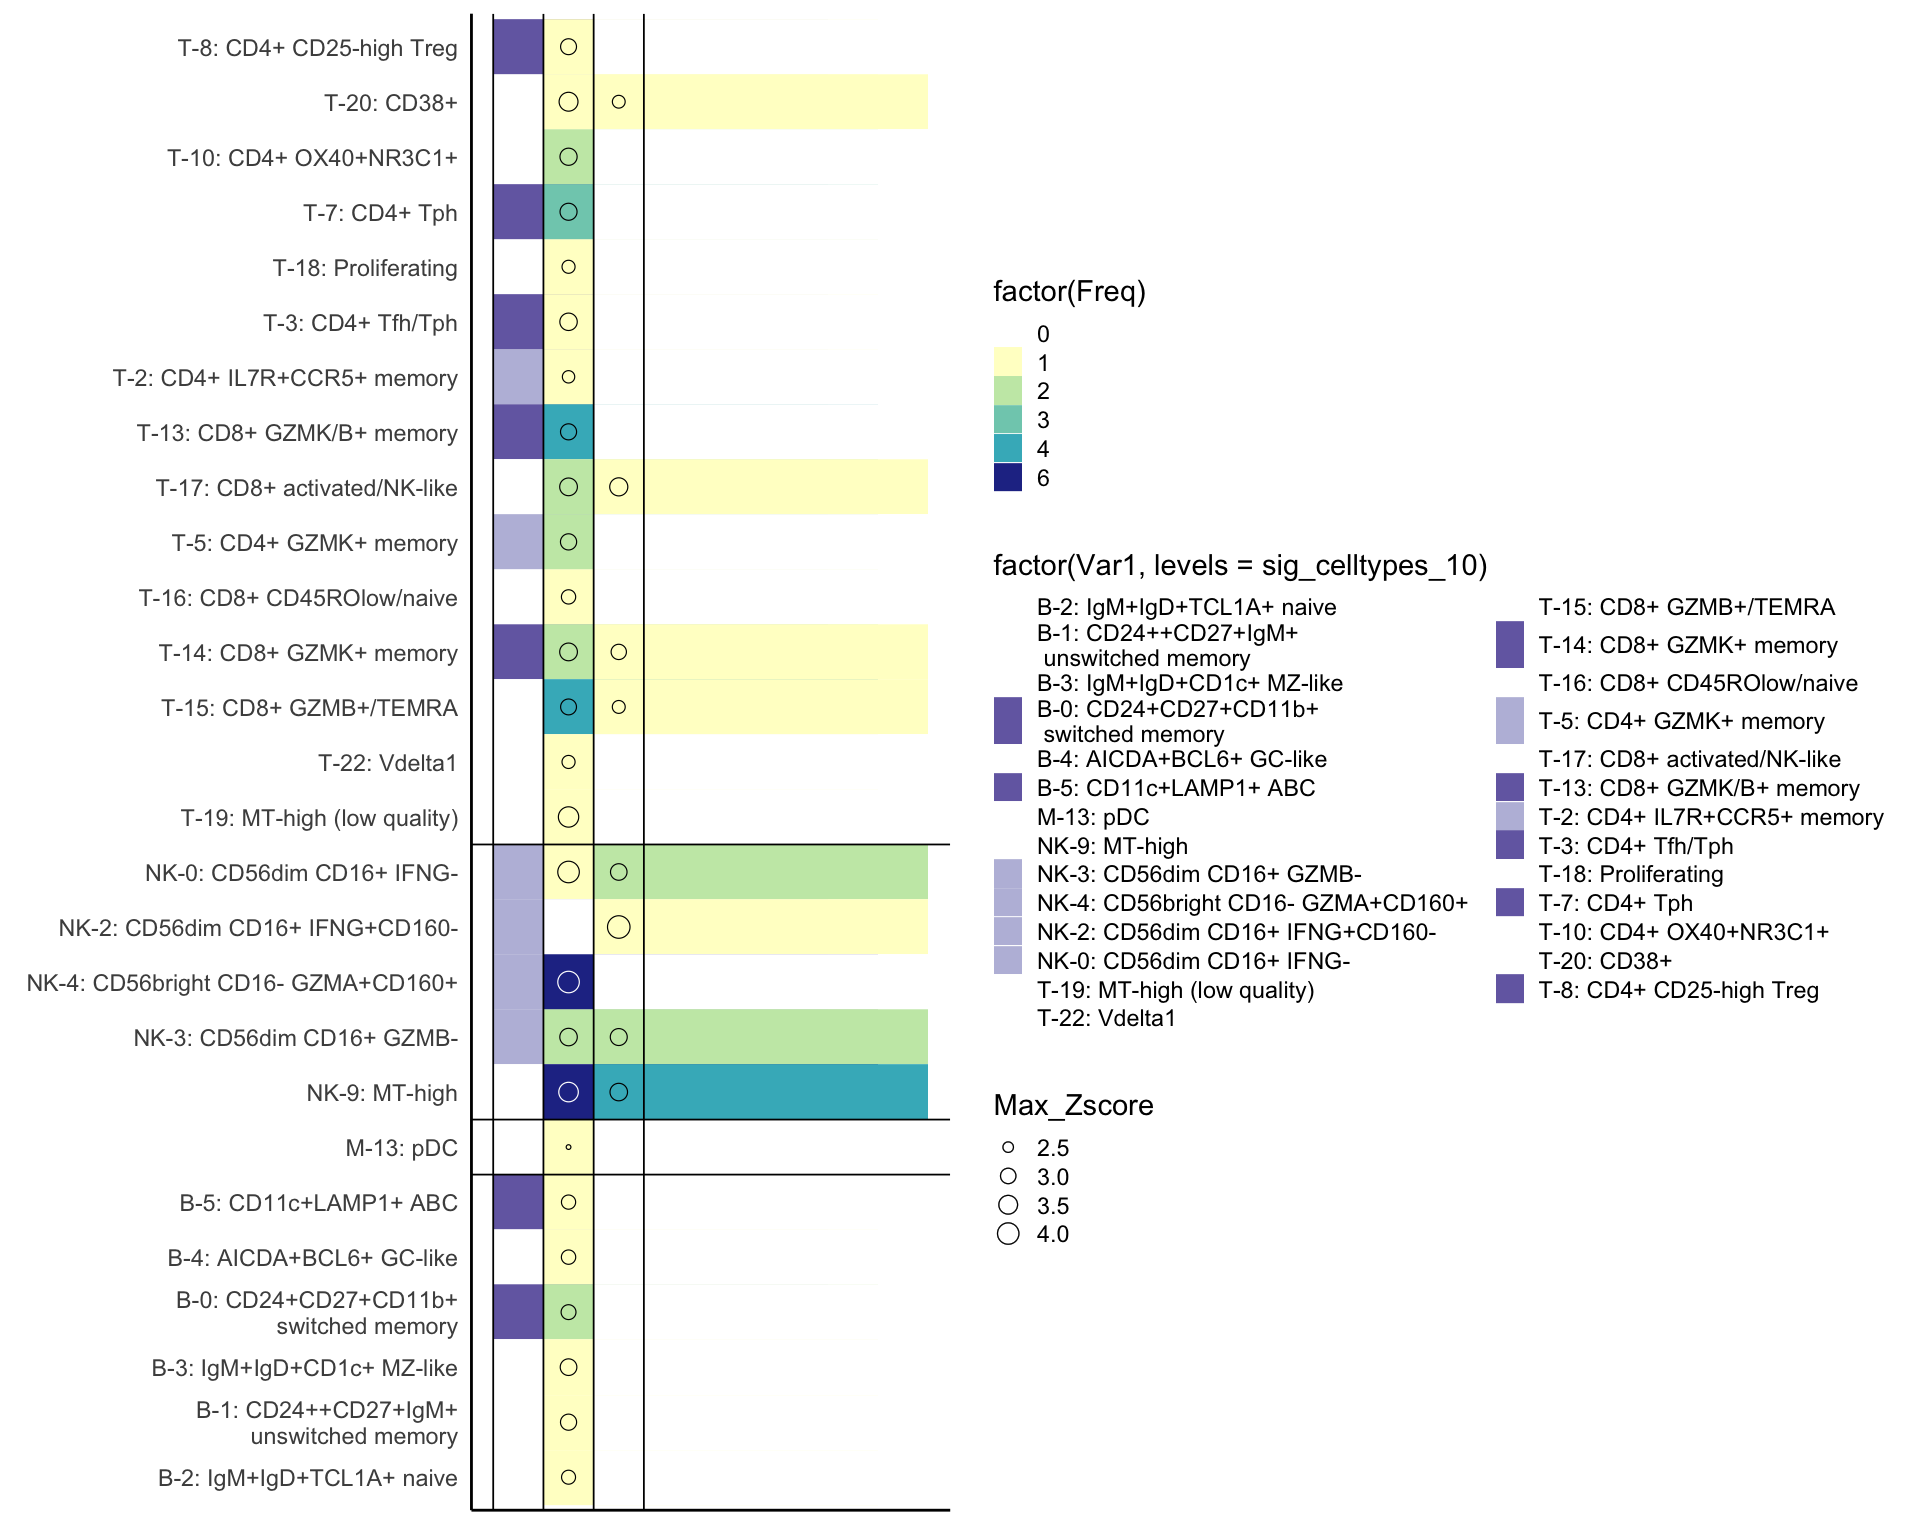

In [114]:
library(ggplot2)
library(ggnewscale)
options(repr.plot.height = 0.473098330241187*length(sig_celltypes_10), repr.plot.width =16)
white_list = c("NK-4: CD56bright CD16- GZMA+CD160+", "NK-9: MT-high")


filt = scgwas_micro_old_count_10[scgwas_micro_old_count_10$Max_Zscore !=0,]
p1 <- ggplot(scgwas_micro_old_count_10) + 
  # First layer: discrete fill
  geom_tile(aes(x=0, y=factor(Var1, levels=sig_celltypes_10), fill=factor(Var1, levels=sig_celltypes_10))) +
  scale_fill_manual(values=exp_colors_clean) + 
  new_scale("fill") + 
  
  # Second layer: continuous fill
  geom_tile(aes(fill=factor(Freq), x=0.15, y=Var1 )) + 
geom_point(data=filt[!filt$Var1 %in% white_list,], aes(x=-.275, y=Var1, size=Max_Zscore),color='black', fill='black', shape=1) +
geom_point(data=filt[filt$Var1 %in% white_list,], aes(x=-.275, y=Var1, size=Max_Zscore),color='white', fill='white', shape=1) +
  scale_fill_manual(values = backup_colors_10) +


# NEW
geom_tile(data=scgwas_micro_new_count_10, aes(x=0.3, y=factor(Var1, levels=sig_celltypes_10), fill=factor(Freq))) +
geom_point(data=scgwas_micro_new_count_10[scgwas_micro_new_count_10$Max_Zscore != 0,], aes(x=-.125, y=Var1, size=Max_Zscore),color='black', fill='black', shape=1) +
    geom_vline(xintercept=-0.35) + geom_vline(xintercept=-0.5) +geom_vline(xintercept=-0.2) +
    geom_vline(xintercept=-0.05) +

geom_hline(yintercept=6.5) + geom_hline(yintercept=7.5) + geom_hline(yintercept=12.5) +
  # Theme settings
theme_classic(base_size =17.5) + 
  theme(#legend.position="none", 
        axis.text.x = element_blank(),
        axis.title.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        axis.ticks.x = element_blank(), 
        axis.title.x = element_blank())
p1

In [117]:
#options(repr.plot.height = 0.473098330241187*nrow(micro_0), repr.plot.width =11)
pdf("./scGWAS_path_10kb.pdf", width=16, height=0.473098330241187*length(sig_celltypes_10))
print(p1)
dev.off() 

pdf 
  2

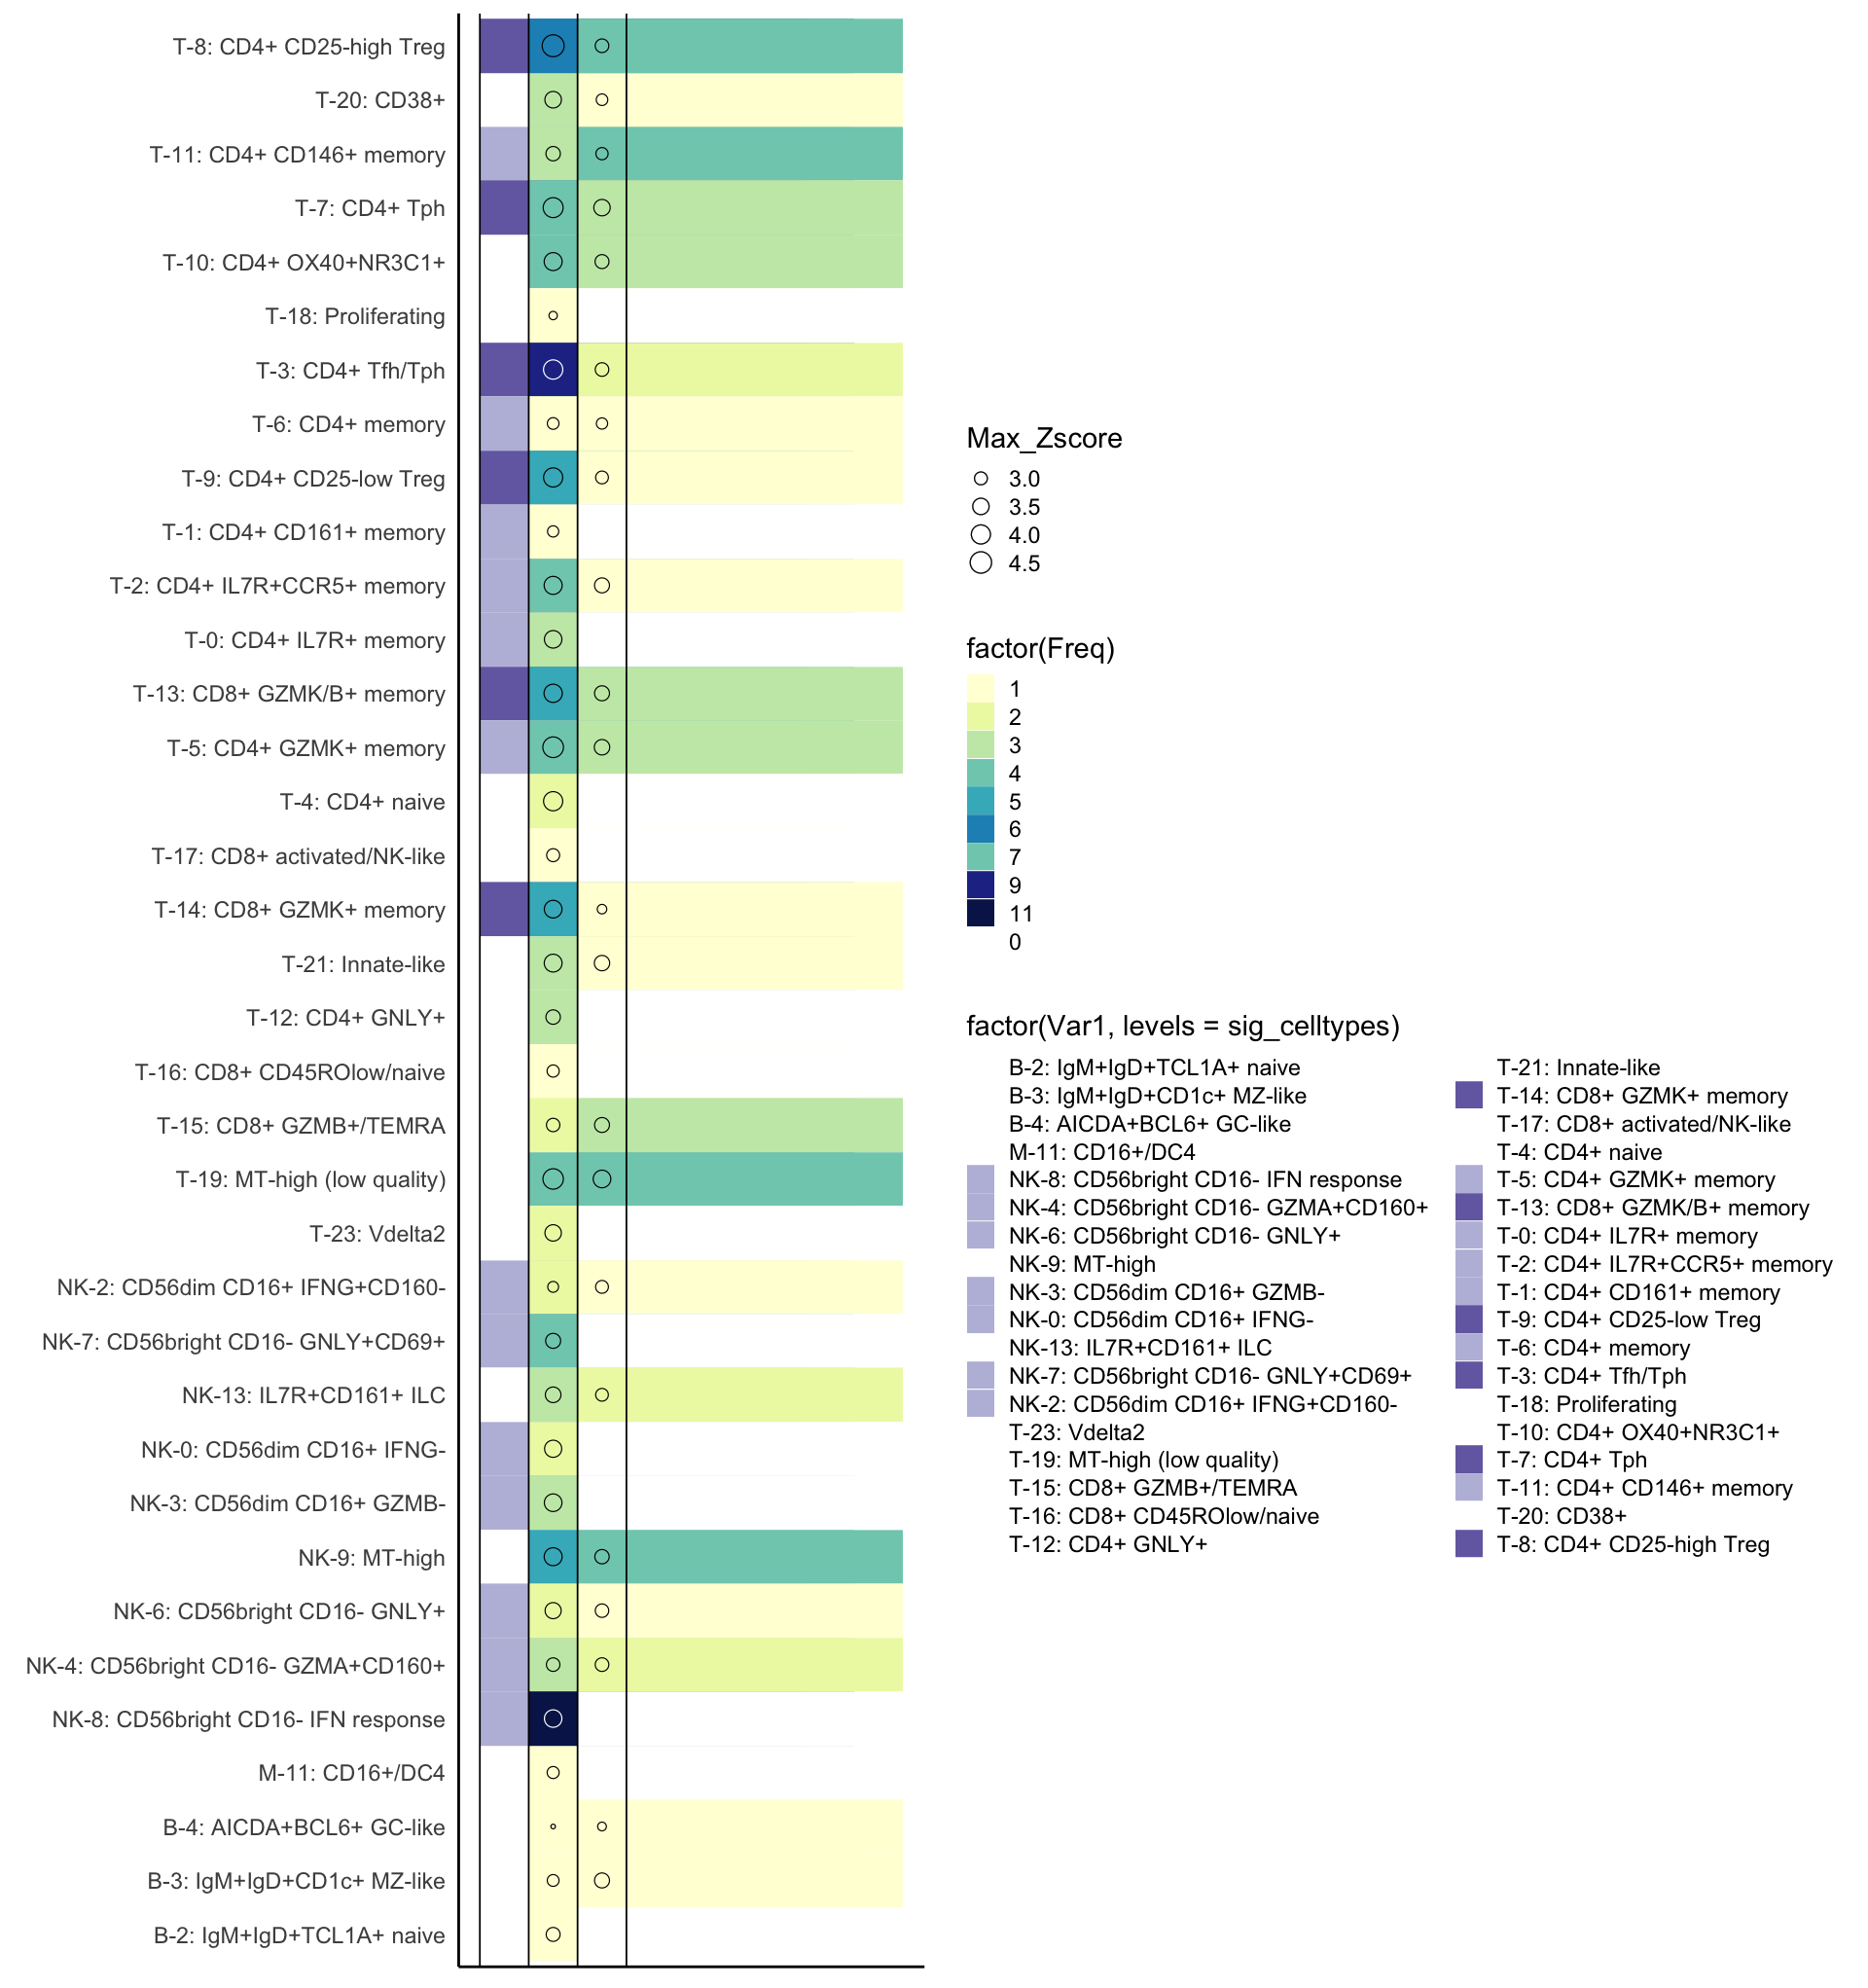

In [120]:
library(ggplot2)
library(ggnewscale)
options(repr.plot.height = 0.473098330241187*length(sig_celltypes), repr.plot.width =16)
white_list = c("T-3: CD4+ Tfh/Tph", "NK-8: CD56bright CD16- IFN response")
p1 <- ggplot(scgwas_micro_old_count) + 
  # First layer: discrete fill
  geom_tile(aes(x=0, y=factor(Var1, levels=sig_celltypes), fill=factor(Var1, levels=sig_celltypes))) +
  scale_fill_manual(values=exp_colors_ra) + 
  new_scale("fill") + 
  
  # Second layer: continuous fill
  geom_tile(aes(fill=factor(Freq), x=0.15, y=Var1 )) + 
geom_point(data=scgwas_micro_old_count[!scgwas_micro_old_count$Var1 %in% white_list,], aes(x=-.275, y=Var1, size=Max_Zscore),color='black', fill='black', shape=1) +
geom_point(data=scgwas_micro_old_count[scgwas_micro_old_count$Var1 %in% white_list,], aes(x=-.275, y=Var1, size=Max_Zscore),color='white', fill='white', shape=1) +
  scale_fill_manual(values = backup_colors) +


# NEW
geom_tile(data=scgwas_micro_new_count, aes(x=0.3, y=factor(Var1, levels=sig_celltypes), fill=factor(Freq))) +
geom_point(data=scgwas_micro_new_count[scgwas_micro_new_count$Max_Zscore != 0,], aes(x=-.125, y=Var1, size=Max_Zscore),color='black', fill='black', shape=1) +
    geom_vline(xintercept=-0.35) + geom_vline(xintercept=-0.5) +geom_vline(xintercept=-0.2) +
    geom_vline(xintercept=-0.05) +
  # Theme settings
theme_classic(base_size =17.5) + 
  theme(#legend.position="none", 
        axis.text.x = element_blank(),
        axis.title.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        axis.ticks.x = element_blank(), 
        axis.title.x = element_blank())
p1

In [121]:
#options(repr.plot.height = 0.473098330241187*nrow(micro_0), repr.plot.width =11)
pdf("./scGWAS_path.pdf", width=16, height=0.473098330241187*length(sig_celltypes_10))
print(p1)
dev.off() 

pdf 
  2

### Compare the list of genes found significant

In [125]:
length(sig_celltypes)
length(sig_celltypes_10)

[1] 36

In [118]:
# have each cell type: genes for scgwas
ra_cell_gene_dict_old = list()
ra_cell_cluster_list_old = list()
ra_cell_gene_list_old = list()

ra_cell_gene_dict_new = list()
ra_cell_cluster_list_new = list()
ra_cell_gene_list_new = list()


for (cluster in sig_celltypes) {
    # get only the gene modules for cell type OLD
    filtered <- scgwas_micro_old[scgwas_micro_old$cell_type == cluster,]
    ra_cell_gene_dict_old[cluster] = list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed))
    ra_cell_cluster_list_old <- append(ra_cell_cluster_list_old, cluster)
    ra_cell_gene_list_old <- append(ra_cell_gene_list_old, 
                             list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed)))
    # get only the gene modules for cell type NEW
    filtered <- scgwas_micro_new[scgwas_micro_new$cell_type == cluster,]
    ra_cell_gene_dict_new[cluster] = list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed))
    ra_cell_cluster_list_new <- append(ra_cell_cluster_list_new, cluster)
    ra_cell_gene_list_new <- append(ra_cell_gene_list_new, 
                             list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed)))
    }
ra_cell_gene_dict_new[cluster]
ra_cell_gene_dict_old[cluster]




# have each cell type: genes for scgwas
ra_cell_gene_dict_old_10 = list()
ra_cell_cluster_list_old_10 = list()
ra_cell_gene_list_old_10 = list()

ra_cell_gene_dict_new_10 = list()
ra_cell_cluster_list_new_10 = list()
ra_cell_gene_list_new_10 = list()


for (cluster in sig_celltypes_10) {
    # get only the gene modules for cell type OLD
    filtered <- scgwas_micro_old_10[scgwas_micro_old_10$cell_type == cluster,]
    ra_cell_gene_dict_old_10[cluster] = list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed))
    ra_cell_cluster_list_old_10 <- append(ra_cell_cluster_list_old_10, cluster)
    ra_cell_gene_list_old_10 <- append(ra_cell_gene_list_old_10, 
                             list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed)))
    # get only the gene modules for cell type NEW
    filtered <- scgwas_micro_new_10[scgwas_micro_new_10$cell_type == cluster,]
    ra_cell_gene_dict_new_10[cluster] = list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed))
    ra_cell_cluster_list_new_10 <- append(ra_cell_cluster_list_new_10, cluster)
    ra_cell_gene_list_new_10 <- append(ra_cell_gene_list_new_10, 
                             list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed)))
    }
ra_cell_gene_dict_new_10[cluster]
ra_cell_gene_dict_old_10[cluster]

$`T-8: CD4+ CD25-high Treg`
 [1] "CD2"     "CORO1A"  "CTLA4"   "ETS1"    "LCK"     "CD2"     "CD247"  
 [8] "CTLA4"   "PTPRC"   "CD2"     "PTPRC"   "STAT1"   "TNFAIP3" "CD2"    
[15] "DDX6"    "PTPRC"   "LCK"     "MYCBP2"  "RABAC1"  "ASCC2"

$`T-8: CD4+ CD25-high Treg`
 [1] "CD2"     "CORO1A"  "CTLA4"   "ETS1"    "LCK"     "PTPRC"   "CD2"    
 [8] "CD247"   "CORO1A"  "CTLA4"   "ETS1"    "CD28"    "CORO1A"  "ETS1"   
[15] "ICOS"    "NCOR1"   "PTPRC"   "CD2"     "PTPRC"   "STAT1"   "TNFAIP3"
[22] "CD2"     "DDX6"    "PTPRC"   "REL"     "CD2"     "DDX6"    "PTPRC"  
[29] "TSPAN17" "MED17"   "MED27"   "NUDT2"   "TBC1D1"  "ASCC1"

$`T-8: CD4+ CD25-high Treg`
character(0)

$`T-8: CD4+ CD25-high Treg`
[1] "CD2"      "DDX6"     "PTPRC"    "REL"      "TNFRSF1B"

In [119]:
# read in pathway files
path_v14 = fread("~/Desktop/SCRNA-GWAS-Benchmarking/data//Pathway/PathwayCommons14.All.hgnc.exPCDHA.MHC.NCBI38.tsv", header=FALSE)
path_v12 = fread("~/Downloads/PathwayCommons12.All.hgnc.exPCDHA.MHC.NCBI37.tsv", header=FALSE)
path_v14[1:2]
v14_genes = union(path_v14$V1, path_v14$V2)
v12_genes = union(path_v12$V1, path_v12$V2)
length(v14_genes)
length(v12_genes)
length(intersect(v14_genes, v12_genes))
length(setdiff(v14_genes, v12_genes))
length(setdiff(v12_genes, v14_genes))

V1    V2  
1 ABCG2 A1BG
2 ATP7A A1BG

[1] 17035

[1] 18246

[1] 16475

[1] 560

[1] 1771

In [120]:
new_sig_genes = do.call(c, ra_cell_gene_list_new)
old_sig_genes = do.call(c, ra_cell_gene_list_old)
length(new_sig_genes)
length(old_sig_genes)

# Number of significant genes that are not found in the other pathway file
length(setdiff(new_sig_genes, v12_genes))
length(setdiff(old_sig_genes, v14_genes))
length(setdiff(new_sig_genes, v14_genes))
length(setdiff(old_sig_genes, v12_genes))



new_sig_genes_10 = do.call(c, ra_cell_gene_list_new_10)
old_sig_genes_10 = do.call(c, ra_cell_gene_list_old_10)
length(new_sig_genes_10)
length(old_sig_genes_10)

# Number of significant genes that are not found in the other pathway file
length(setdiff(new_sig_genes_10, v12_genes))
length(setdiff(old_sig_genes_10, v14_genes))
length(setdiff(new_sig_genes_10, v14_genes))
length(setdiff(old_sig_genes_10, v12_genes))

[1] 264

[1] 697

[1] 0

[1] 0

[1] 0

[1] 0

[1] 73

[1] 286

[1] 0

[1] 1

[1] 0

[1] 0

In [121]:
# For each cell type, get the # intersections, # only new, and # only old
# For only ones, get the number NOT in the other file

values_list = c()
stats_list = c()
cluster_list = c()

for (cluster in sig_celltypes) {
    # get the lists
    v12 = ra_cell_gene_dict_old[[cluster]]
    v14 = ra_cell_gene_dict_new[[cluster]]
    # get the intersection and unique genes of this cluster called under each pathway
    both = intersect(v12, v14)
    v14O = setdiff(v14, v12)
    v12O = setdiff(v12, v14)
    # get how many of the unique genes are MISSING  in the other pathway file
    v14M = setdiff(v12O, v14_genes)
    v12M = setdiff(v14O, v12_genes)
    stats_list = c(stats_list, "Both", "v14\nOnly", "v12\nOnly", "v14M", "v12M", "v14MPer", "v12MPer")
    values_list = c(values_list, length(both), length(v14O), length(v12O), length(v14M), length(v12M), 
                   round(length(v14M)/length(v12O)*100, 2), round(length(v12M)/length(v14O)*100, 2))
    cluster_list = c(cluster_list, rep(cluster, 7))
    
    }
gene_comp_df = data.table("Cluster"=cluster_list, "Stat"=stats_list, "Value"=values_list)
gene_comp_df[1:5,]



values_list_10 = c()
stats_list_10 = c()
cluster_list_10 = c()

for (cluster in sig_celltypes_10) {
    # get the lists
    v12 = ra_cell_gene_dict_old_10[[cluster]]
    v14 = ra_cell_gene_dict_new_10[[cluster]]
    # get the intersection and unique genes of this cluster called under each pathway
    both = intersect(v12, v14)
    v14O = setdiff(v14, v12)
    v12O = setdiff(v12, v14)
    # get how many of the unique genes are MISSING  in the other pathway file
    v14M = setdiff(v12O, v14_genes)
    v12M = setdiff(v14O, v12_genes)
    stats_list_10 = c(stats_list_10, "Both", "v14\nOnly", "v12\nOnly", "v14M", "v12M", "v14MPer", "v12MPer")
    values_list_10 = c(values_list_10, length(both), length(v14O), length(v12O), length(v14M), length(v12M), 
                   round(length(v14M)/length(v12O)*100, 2), round(length(v12M)/length(v14O)*100, 2))
    cluster_list_10 = c(cluster_list_10, rep(cluster, 7))
    
    }
gene_comp_df_10 = data.table("Cluster"=cluster_list_10, "Stat"=stats_list_10, "Value"=values_list_10)
gene_comp_df_10[1:5,]

Cluster                   Stat      Value
1 B-2: IgM+IgD+TCL1A+ naive Both      0    
2 B-2: IgM+IgD+TCL1A+ naive v14\nOnly 0    
3 B-2: IgM+IgD+TCL1A+ naive v12\nOnly 4    
4 B-2: IgM+IgD+TCL1A+ naive v14M      0    
5 B-2: IgM+IgD+TCL1A+ naive v12M      0

Cluster                   Stat      Value
1 B-2: IgM+IgD+TCL1A+ naive Both      0    
2 B-2: IgM+IgD+TCL1A+ naive v14\nOnly 0    
3 B-2: IgM+IgD+TCL1A+ naive v12\nOnly 6    
4 B-2: IgM+IgD+TCL1A+ naive v14M      0    
5 B-2: IgM+IgD+TCL1A+ naive v12M      0

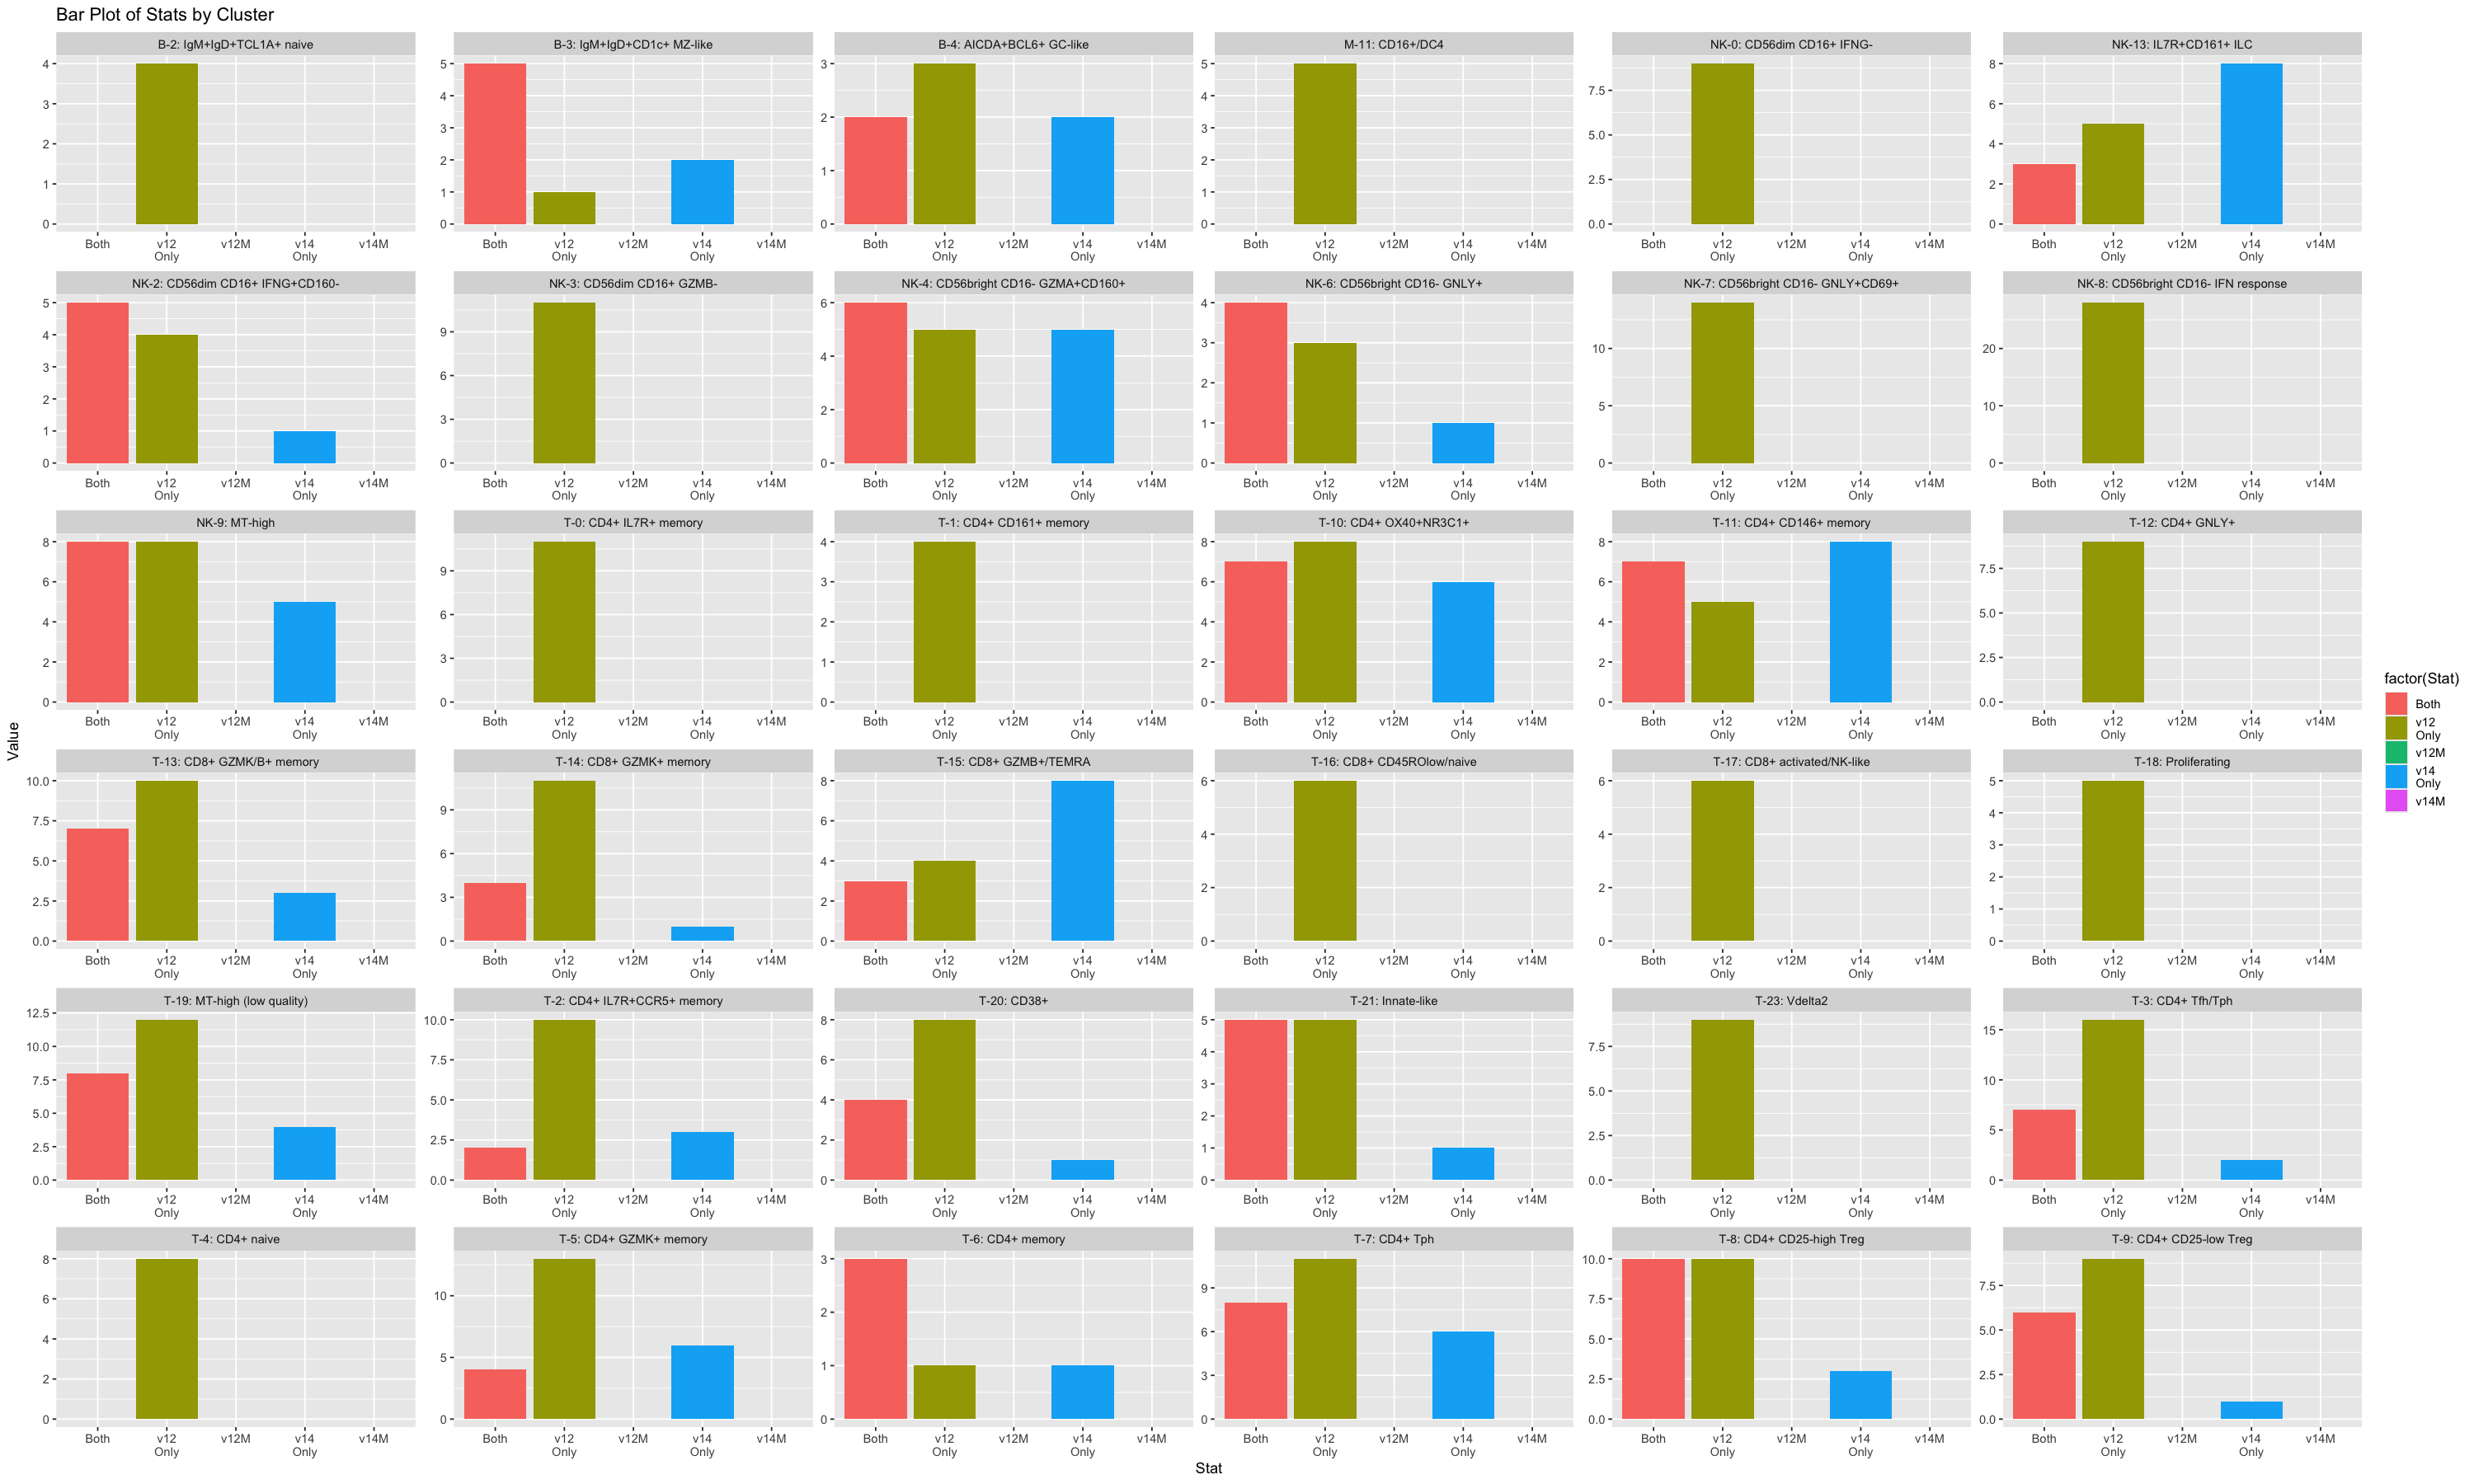

In [172]:

# Create the bar plot
ggplot(gene_comp_df[gene_comp_df$Stat %in% c("Both", "v14\nOnly", "v12\nOnly", "v14M", "v12M"),], 
       aes(x = Stat, y = Value, fill = factor(Stat))) +  # Fill color by 'Stat'
  geom_bar(stat = "identity", position = "dodge") +  # Bar plot with 'identity' for the 'Value' column
  facet_wrap(~ Cluster, scales = "free") +         # Create separate plots for each 'Cluster'
  labs(title = "Bar Plot of Stats by Cluster",
       x = "Stat",
       y = "Value")    

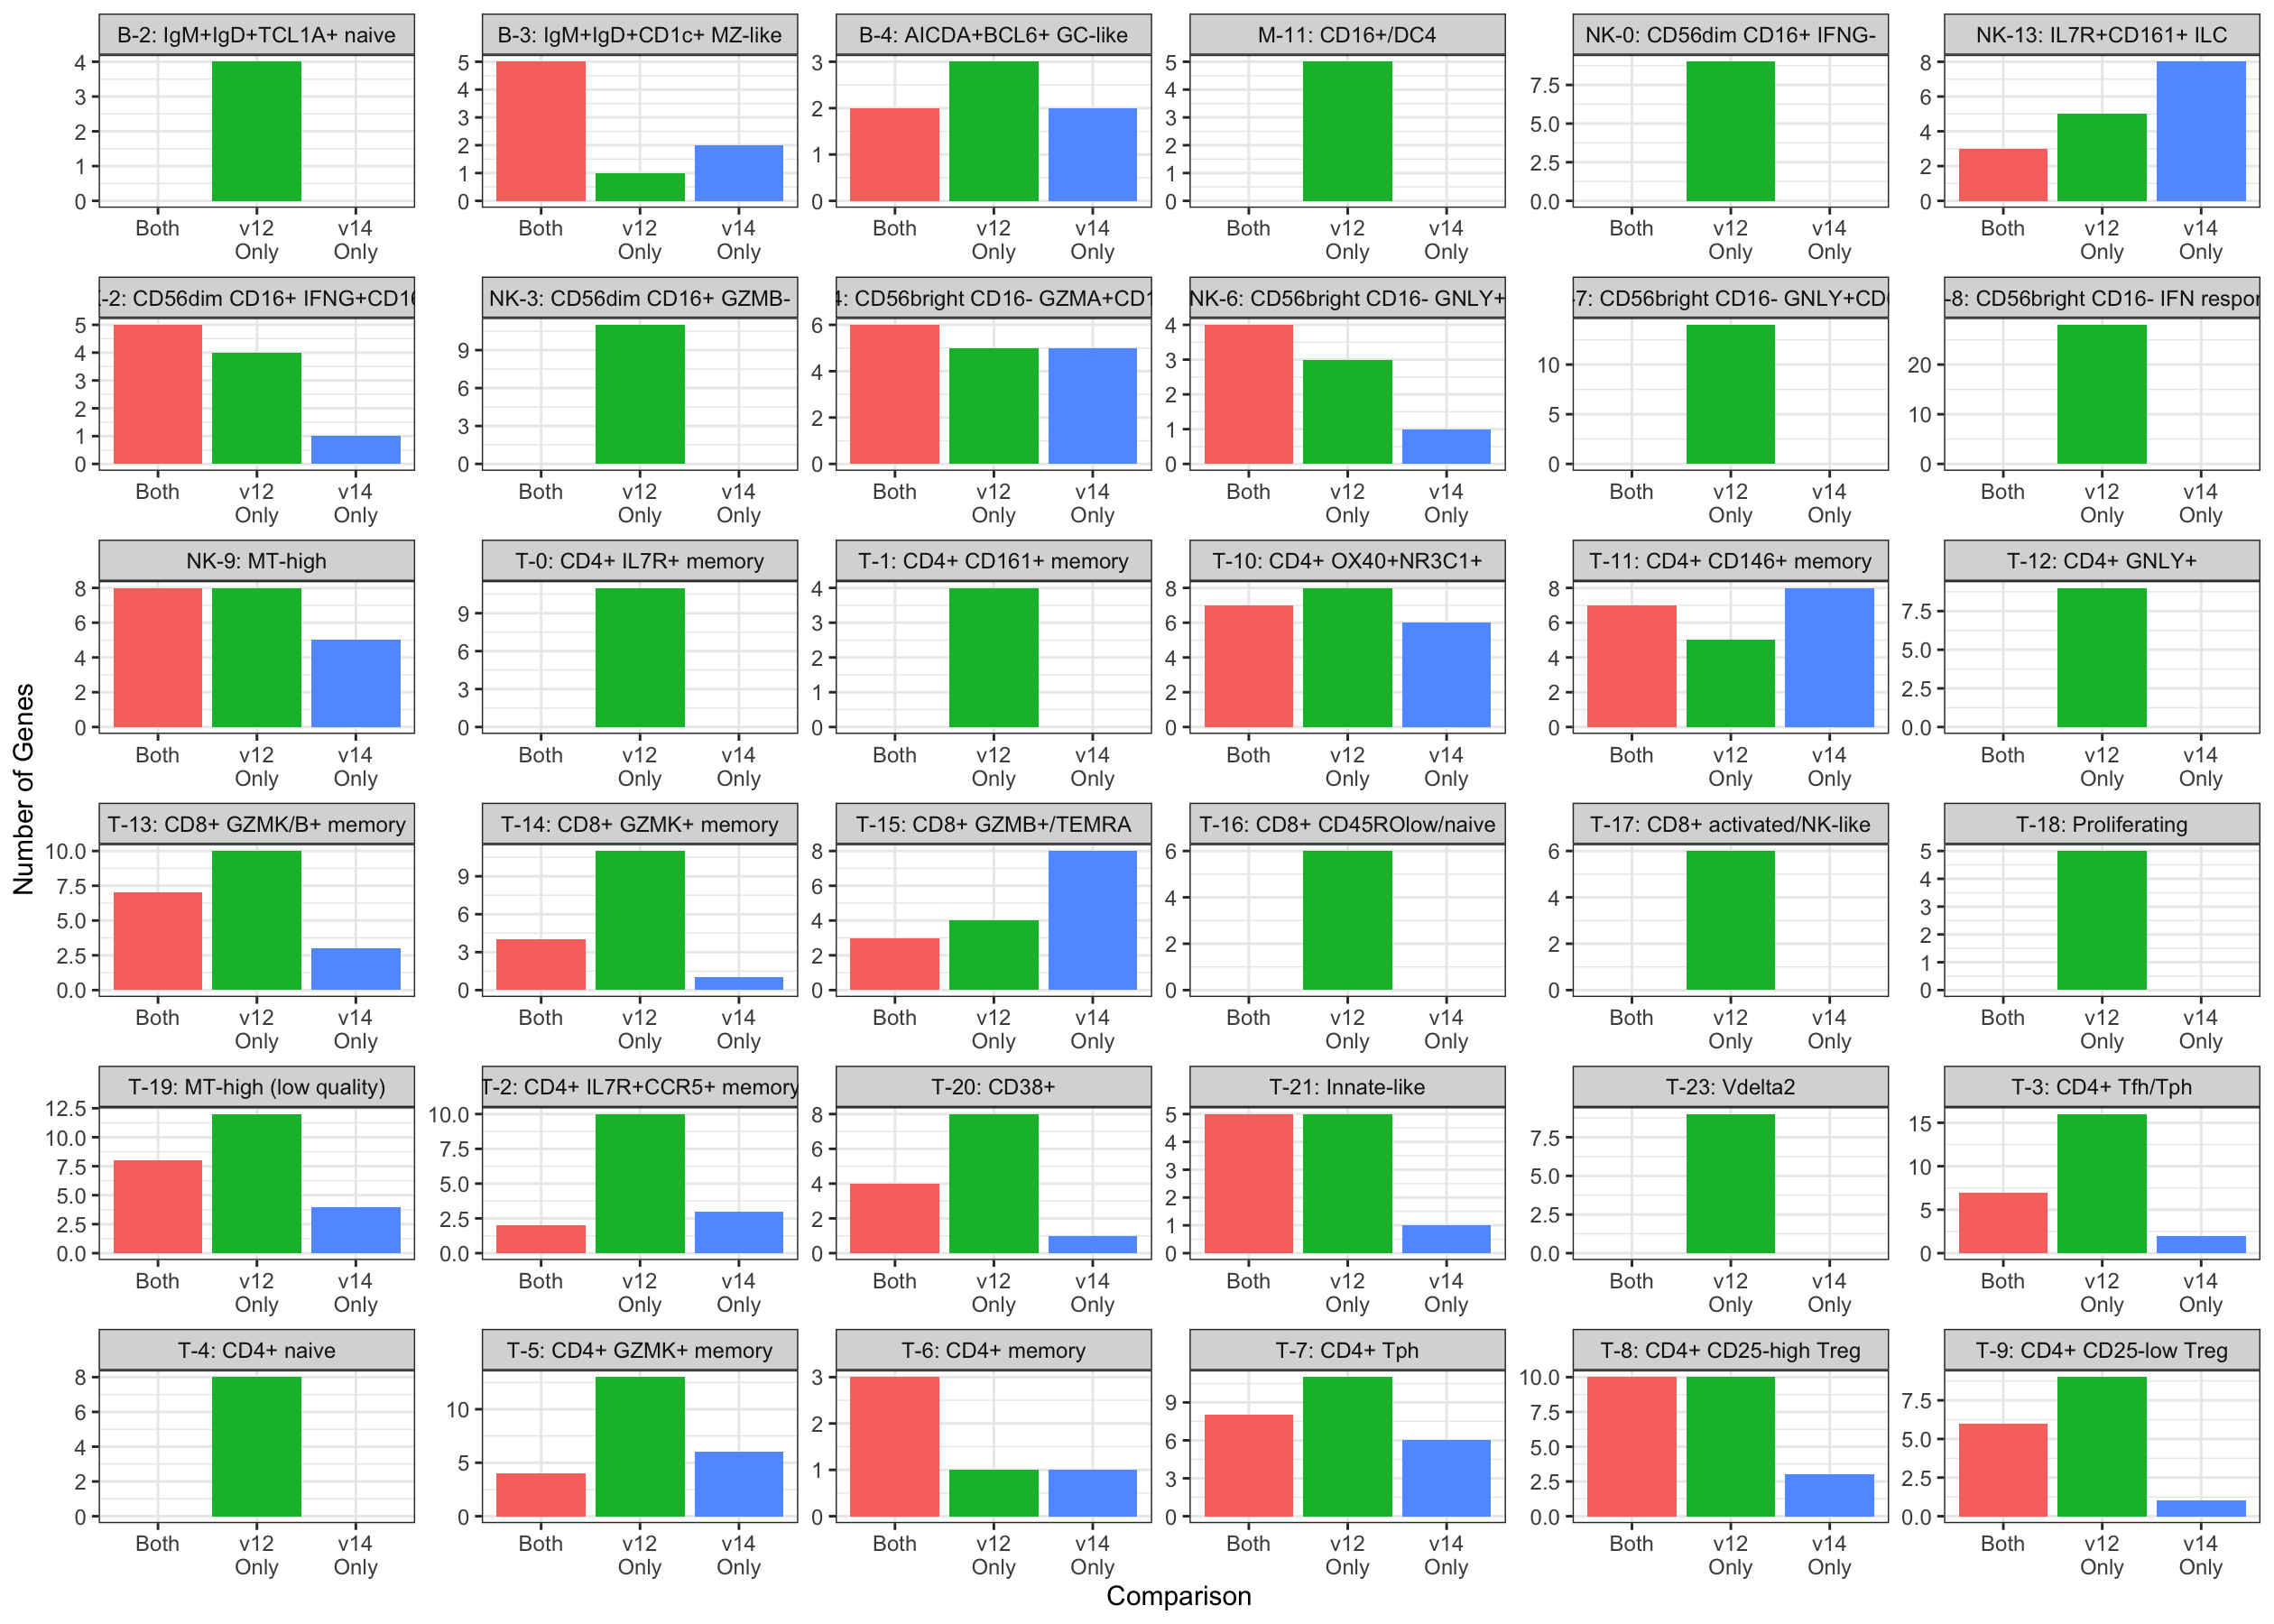

In [125]:
options(repr.plot.height=15, repr.plot.width=21)
# Create the bar plot
ggplot(gene_comp_df[gene_comp_df$Stat %in% c("Both", "v14\nOnly", "v12\nOnly"),], 
       aes(x = Stat, y = Value, fill = factor(Stat))) +  # Fill color by 'Stat'
  geom_bar(stat = "identity", position = "dodge") +  # Bar plot with 'identity' for the 'Value' column
  facet_wrap(~ Cluster, scales = "free") +         # Create separate plots for each 'Cluster'
  labs(
       x = "Comparison",
       y = "Number of Genes", fill="Comparison")    + theme_bw(base_size=18) + theme(legend.position="None")

In [126]:
ggsave("./RA_scGWAS_Path_GeneComp_535.png", dpi=300, width=21, height=15)

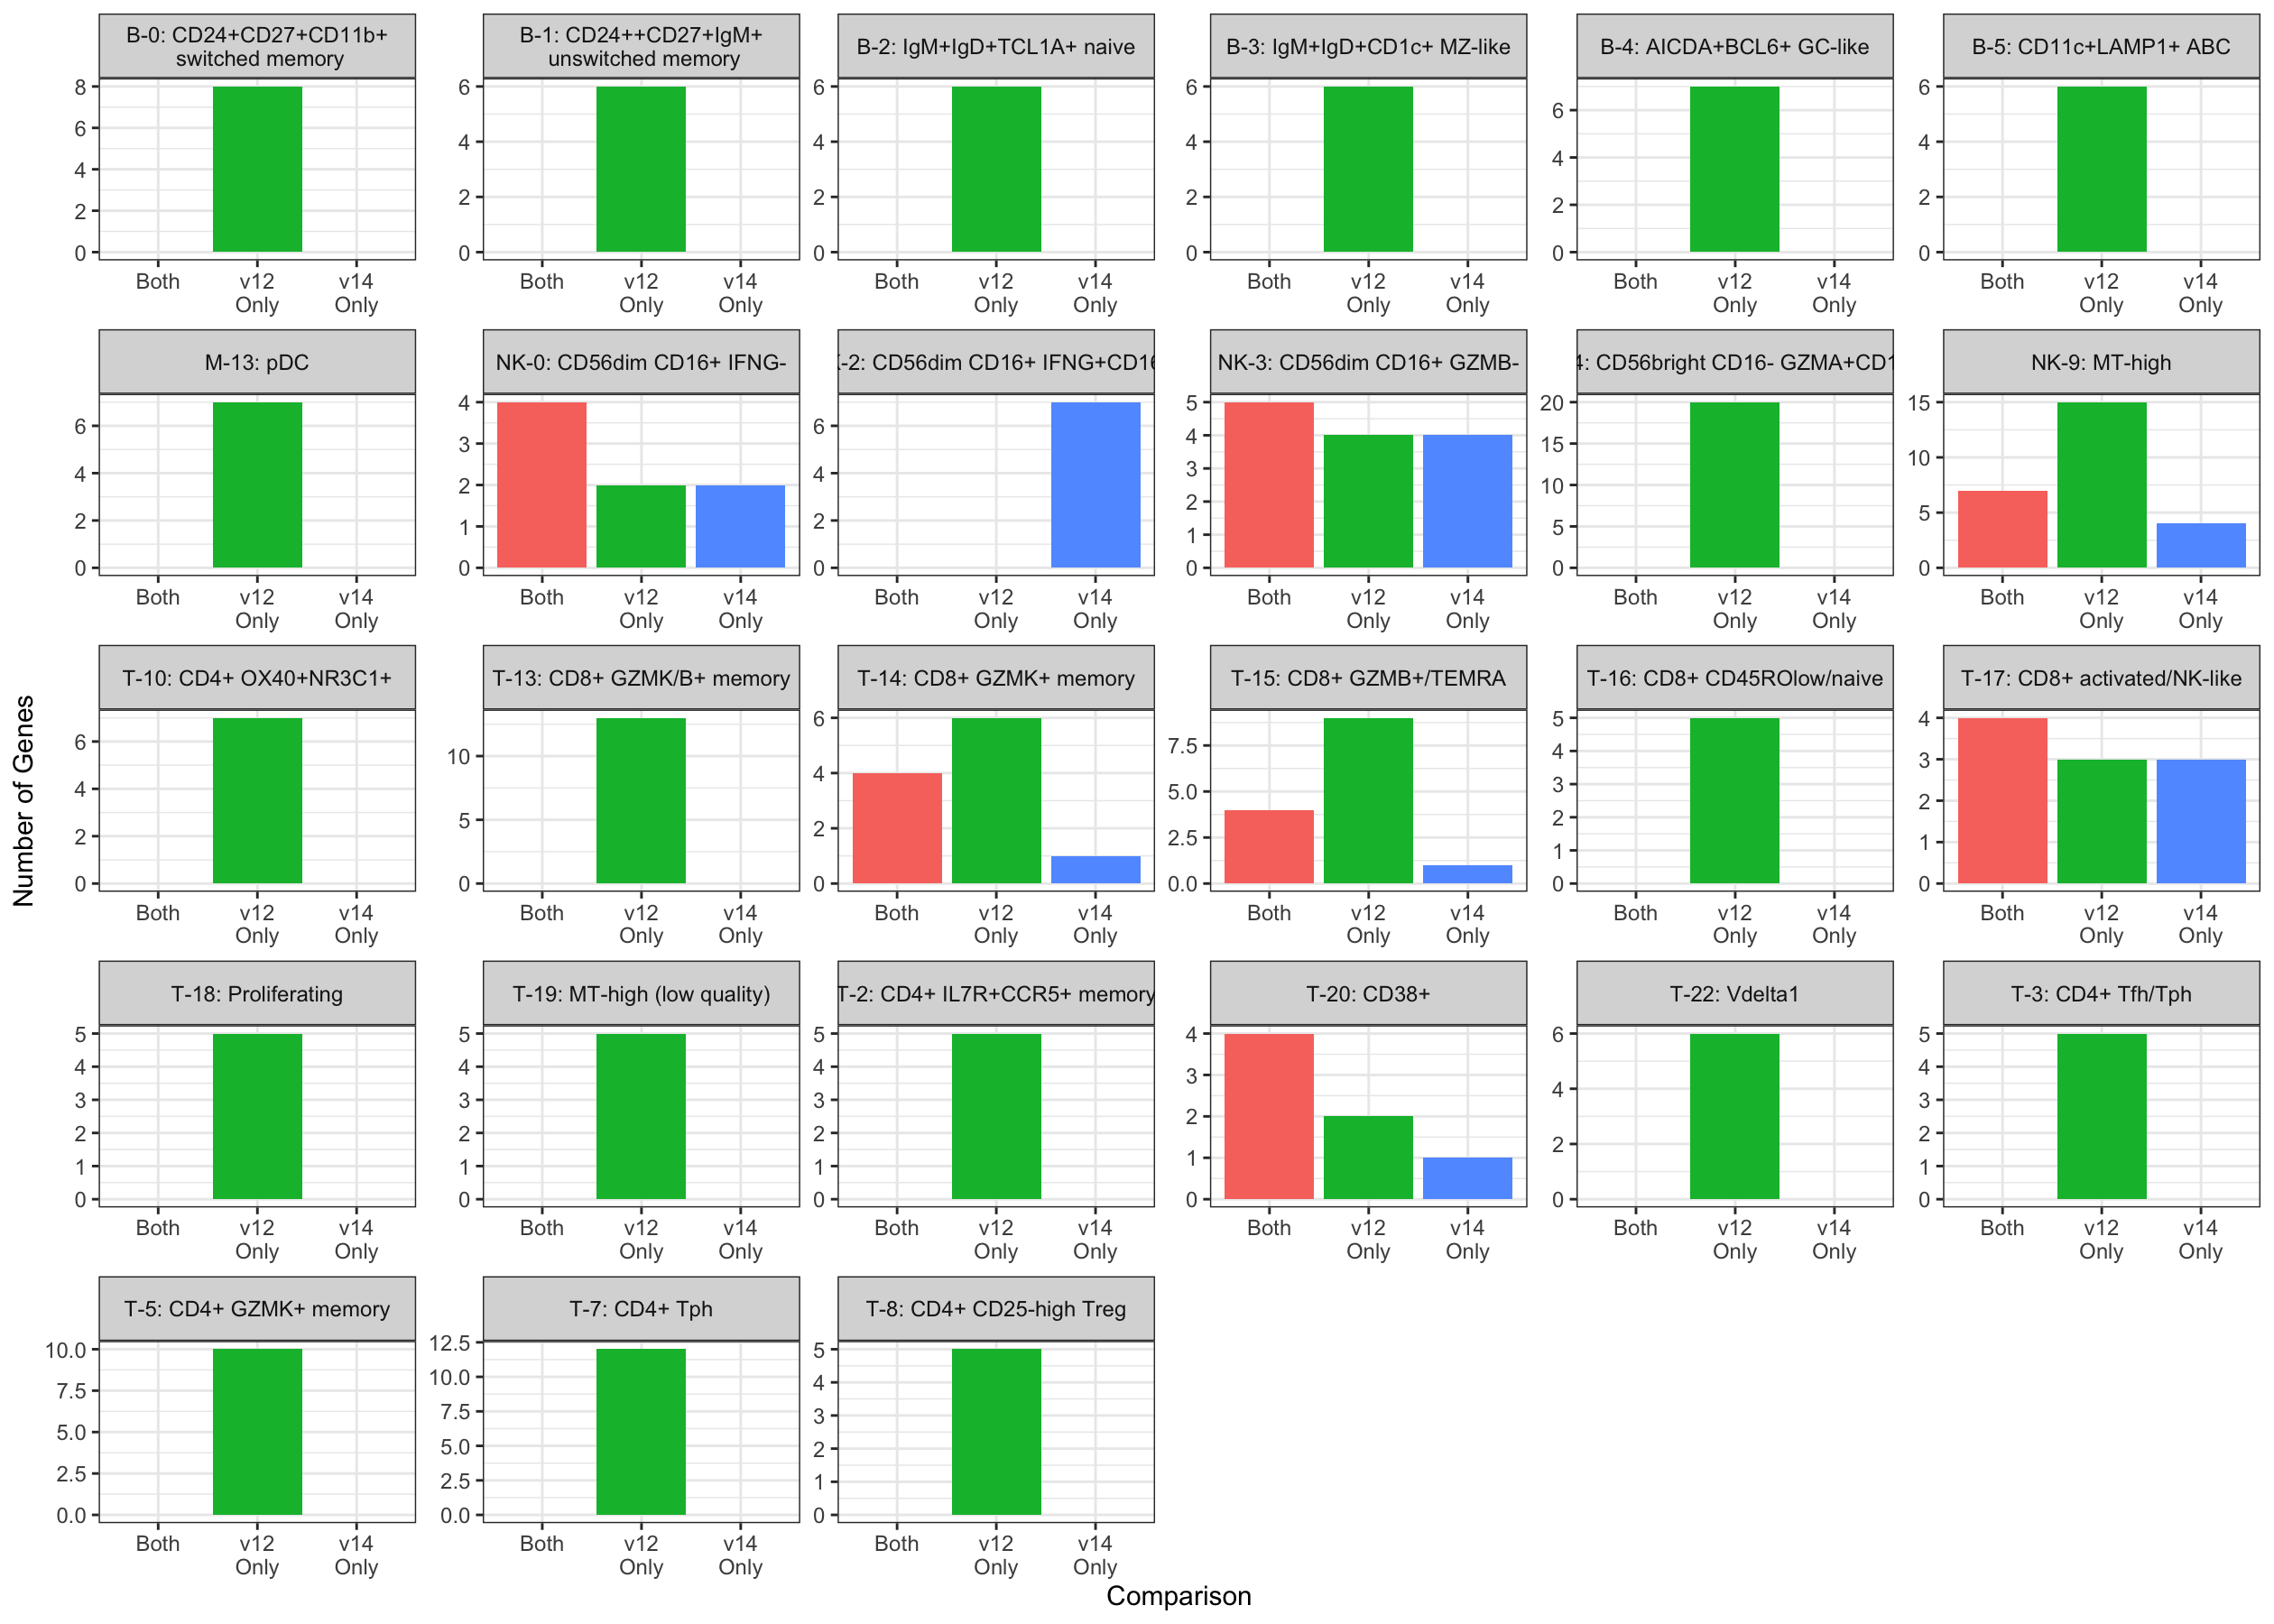

In [123]:
options(repr.plot.height=15, repr.plot.width=21)
# Create the bar plot
ggplot(gene_comp_df_10[gene_comp_df_10$Stat %in% c("Both", "v14\nOnly", "v12\nOnly"),], 
       aes(x = Stat, y = Value, fill = factor(Stat))) +  # Fill color by 'Stat'
  geom_bar(stat = "identity", position = "dodge") +  # Bar plot with 'identity' for the 'Value' column
  facet_wrap(~ Cluster, scales = "free") +         # Create separate plots for each 'Cluster'
  labs(
       x = "Comparison",
       y = "Number of Genes", fill="Comparison")    + theme_bw(base_size=18) + theme(legend.position="None")

In [124]:
ggsave("./RA_scGWAS_Path_GeneComp_10kb.png", dpi=300, width=21, height=15)